<a href="https://colab.research.google.com/github/sungjindo/algorismtrading/blob/main/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EB%8F%84%EC%84%B1%EC%A7%84_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cvxopt as opt
from cvxopt import solvers
import warnings




In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# DATA


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/gdrive/MyDrive/로보어드바이저/ETF 수정주가.xlsx', index_col = 0)

In [ ]:
data

,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,KODEX China H,...,KBSTAR 대형고배당10TR,KINDEX 싱가포르리츠,KOSEF 코스닥150,TIGER 골드선물(H),KBSTAR KRX300미국달러선물혼합,KINDEX 스마트퀄리티,KINDEX 스마트로우볼,KINDEX 스마트하이베타,HANARO e커머스,HANARO 고배당
Name,,,,,,,,,,,,,,,,,,,,,
2008-01-02,20269,20727,11495,8876,6826,32556,8896,10608,8646,19165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,20247,20788,11388,8777,7036,32548,8788,10589,8584,18770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,20341,20845,10958,8802,6826,32671,8800,10608,8700,18825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,19929,20475,10654,8673,6780,31960,8655,10340,8514,18605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,19861,20418,10586,8594,6734,31823,8589,10275,8382,18970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-22,29055,29420,22815,7675,15710,46835,7855,23180,9490,21965,...,10830.0,10690.0,6060.0,9830.0,10300.0,12630.0,12430.0,10020.0,NaN,NaN
2019-04-23,29105,29460,22940,7730,15870,46855,7935,23370,9475,22285,...,10880.0,10680.0,6060.0,9810.0,10315.0,12620.0,12420.0,9995.0,9925.0,9955.0
2019-04-24,28790,29165,22785,7630,15950,46325,7810,23180,9490,22220,...,10745.0,10765.0,6020.0,9760.0,10240.0,12505.0,12320.0,9860.0,9835.0,9945.0


In [ ]:
#백레스팅 기간을 기준으로 그 이전에 데이터가 없는 데이터는 잘라내기.
for i in data.columns :
  if pd.isnull(data.loc['2017-04-26',i]):
    data = data.drop(i,axis=1)

In [ ]:
data

,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,KODEX China H,...,KODEX 경기소비재,KODEX 필수소비재,KODEX 헬스케어,ARIRANG 중형주저변동50,TIGER 코스닥150로우볼,KBSTAR 미국장기국채선물(H),KBSTAR 미국장기국채선물인버스(H),KBSTAR 미국장기국채선물레버리지(합성 H),KBSTAR 미국장기국채선물인버스2X(합성 H),TIGER 200선물레버리지
Name,,,,,,,,,,,,,,,,,,,,,
2008-01-02,20269,20727,11495,8876,6826,32556,8896,10608,8646,19165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,20247,20788,11388,8777,7036,32548,8788,10589,8584,18770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,20341,20845,10958,8802,6826,32671,8800,10608,8700,18825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,19929,20475,10654,8673,6780,31960,8655,10340,8514,18605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,19861,20418,10586,8594,6734,31823,8589,10275,8382,18970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-22,29055,29420,22815,7675,15710,46835,7855,23180,9490,21965,...,12210.0,10095.0,15710.0,10005.0,12790.0,10070.0,9815.0,9875.0,9495.0,10180.0
2019-04-23,29105,29460,22940,7730,15870,46855,7935,23370,9475,22285,...,12310.0,10080.0,15700.0,9930.0,12775.0,10060.0,9825.0,9845.0,9510.0,10220.0
2019-04-24,28790,29165,22785,7630,15950,46325,7810,23180,9490,22220,...,12285.0,10085.0,15520.0,9840.0,12730.0,10085.0,9770.0,9905.0,9475.0,10025.0


In [ ]:
riskfree = ['TIGER 단기통안채',
'KODEX 단기채권',
'KODEX 단기채권PLUS',
'KODEX 종합채권(AA-이상)액티브',
'KBSTAR 단기통안채',
'KINDEX 단기통안채',
'KBSTAR KIS종합채권(A-이상)액티브',
'TIGER 단기채권액티브',
'KOSEF 국고채10년',
'KBSTAR KIS단기종합채권(AA-이상)액티브',
'TIGER 미국달러단기채권액티브',
'HANARO 단기채권액티브',
'KOSEF 단기자금',
'KBSTAR 단기국공채액티브',
'KODEX 국고채3년',
'KODEX 단기변동금리부채권액티브',
'SOL KIS단기통안채',
'KODEX 장기종합채권(AA-이상)액티브',
'KBSTAR KIS국고채30년Enhanced',
'KODEX 국채선물10년인버스',
'KODEX 국채선물10년',
'TIGER 미국채10년선물',
'KBSTAR 국채선물5년추종인버스',
'ARIRANG 국채선물3년',
'TIGER 국채3년',
'TIGER 중장기국채',
'KBSTAR 중기우량회사채'
'히어로즈 단기채권ESG액티브',
'KOSEF 통안채1년',
'KINDEX 국고채3년',
'KBSTAR 국채선물5년추종',
'KINDEX 종합채권(AA-이상)KIS액티브',
'KOSEF 국고채3년',
'KODEX 200미국채혼합',
'KBSTAR 금융채액티브',
'ARIRANG 우량회사채50 1년',
'ARIRANG 미국장기우량회사채',
'KODEX 미국채울트라30년선물(H)',
'KBSTAR 중장기국공채액티브',
'ARIRANG 미국단기우량회사채',
'KBSTAR 국고채3년',
'KODEX 미국채10년선물',
'ARIRANG 단기채권액티브',
'TIGER 단기선진하이일드(합성 H)',
'KINDEX 국고채10년',
'KINDEX 중장기국공채액티브',
'ARIRANG 국채선물10년',
'KOSEF 국고채10년레버리지',
'KODEX 미국채울트라30년선물인버스(H)',
'파워 중기국고채',
'KODEX 국채선물3년인버스',
'KINDEX 국채선물10년인버스',
'KINDEX 국채선물3년인버스',
'KBSTAR 미국장기국채선물(H)',
'KBSTAR 미국장기국채선물인버스(H)',
'KBSTAR 국채선물10년인버스',
'HANARO KAP초장기국고채',
'KBSTAR 미국장기국채선물인버스2X(합성H)',
'KBSTAR 미국장기국채선물레버리지(합성H)',
'KBSTAR 국채선물10년'
'KINDEX 중기국고채'
'KBSTAR 중기우량 회사채'
'KBSTAR 채권혼합'
'파워 단기채'
'KODEX 배당성장채권혼합'
'TIGER 경기방어채권혼합'
'ARIRANG 스마트베타Quality채권혼합'
'KBSTAR V&S셀렉트밸류채권혼합'
'ARIRANG 고배당주채권혼합'
'KBSTAR 헬스케어채권혼합'
'ARIRANG 단기우량채권'
'ARIRANG 바벨 채권'
'KBSTAR 미국장기국채'
'KBSTAR 미국장기국채선물레버리지(합성 H)'
]

In [ ]:
for i in data.columns :
  if i in riskfree:
    data = data.drop(i,axis=1)

In [ ]:
holding_periods=1
n_term=252 
returns = data.pct_change(holding_periods).iloc[holding_periods:]
exp_rets = returns.mean() * n_term 
cov_mat = returns.cov() * n_term 
corr_mat = returns.corr()[exp_rets[exp_rets > 0].index] 

In [ ]:
# #수익률 평균이 마이너스인 것들 잘라내기 
# data = data[exp_rets[exp_rets > 0].index]
# data

In [ ]:
holding_periods=1
n_term=252 

returns = data.pct_change(holding_periods).iloc[holding_periods:] 
exp_rets = returns.mean() * n_term
cov_mat = returns.cov() * n_term
corr_mat = returns.corr()[exp_rets[exp_rets > 0].index] 

In [ ]:
returns

,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,KODEX China H,...,KODEX 미디어&엔터테인먼트,KODEX IT,KODEX 경기소비재,KODEX 필수소비재,KODEX 헬스케어,ARIRANG 중형주저변동50,TIGER 코스닥150로우볼,KBSTAR 미국장기국채선물레버리지(합성 H),KBSTAR 미국장기국채선물인버스2X(합성 H),TIGER 200선물레버리지
Name,,,,,,,,,,,,,,,,,,,,,
2008-01-03,-0.001085,0.002943,-0.009308,-0.011154,0.030765,-0.000246,-0.012140,-0.001791,-0.007171,-0.020610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,0.004643,0.002742,-0.037759,0.002848,-0.029847,0.003779,0.001365,0.001794,0.013514,0.002930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,-0.020255,-0.017750,-0.027742,-0.014656,-0.006739,-0.021762,-0.016477,-0.025264,-0.021379,-0.011687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,-0.003412,-0.002784,-0.006383,-0.009109,-0.006785,-0.004287,-0.007626,-0.006286,-0.015504,0.019618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-09,0.006445,0.004702,0.010486,-0.002909,-0.002673,0.006976,-0.000931,0.010803,0.001790,-0.010807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-22,0.000172,0.000340,-0.008475,-0.005185,-0.003489,0.000000,-0.008207,-0.011514,-0.001053,-0.004306,...,0.003121,-0.006759,-0.000409,0.004478,0.005118,0.001502,0.000000,-0.007538,-0.003150,-0.000491
2019-04-23,0.001721,0.001360,0.005479,0.007166,0.010185,0.000427,0.010185,0.008197,-0.001581,0.014569,...,-0.005333,-0.002402,0.008190,-0.001486,-0.000637,-0.007496,-0.001173,-0.003038,0.001580,0.003929
2019-04-24,-0.010823,-0.010014,-0.006757,-0.012937,0.005041,-0.011311,-0.015753,-0.008130,0.001583,-0.002917,...,0.003128,-0.016453,-0.002031,0.000496,-0.011465,-0.009063,-0.003523,0.006094,-0.003680,-0.019080


In [ ]:
data.columns[:100]

Index(['KODEX 200', 'KOSEF 200', 'KODEX 반도체', 'KODEX 은행', 'KODEX 자동차',
       'TIGER KRX100', 'TIGER 은행', 'TIGER 반도체', 'TIGER 방송통신', 'KODEX China H',
       'KOSEF KRX100', 'KODEX 일본TOPIX100', 'TIGER 200', 'KODEX 삼성그룹',
       'KODEX 기계장비', 'KODEX 증권', 'KOSEF 블루칩', 'KOSEF 고배당', 'TIGER 라틴35',
       'KINDEX 200', 'KBSTAR 5대그룹주', 'KINDEX 삼성그룹섹터가중', 'TREX 200',
       'KINDEX 중기국고채', 'KODEX 인버스', 'KODEX 에너지화학', 'KODEX 철강', 'TIGER 차이나항셍25',
       'KODEX 건설', 'ARIRANG 코스피50', 'KODEX 레버리지', 'TIGER 인버스', 'TIGER 레버리지',
       'TIGER 원유선물Enhanced(H)', 'KINDEX 삼성그룹동일가중', 'KODEX 골드선물(H)',
       'TIGER 미국나스닥100', 'KBSTAR 중기우량회사채', 'TIGER 농산물선물Enhanced(H)',
       '마이다스 200커버드콜5%OTM', 'KOSEF 미국달러선물', 'TIGER 삼성그룹펀더멘털',
       'TIGER LG그룹+펀더멘털', 'TIGER 현대차그룹+펀더멘털', 'KODEX 구리선물(H)', 'KODEX 콩선물(H)',
       'TIGER 200 건설', 'TIGER 200 중공업', 'TIGER 200 철강소재', 'TIGER 200 에너지화학',
       'TIGER 200 IT', 'TIGER 200 금융', 'TIGER 경기방어', 'TIGER 200 경기소비재',
       'TIGER 금속선물(H)', 'TIGER 금은선물(H)', 'KOSEF 미국달러선물인

In [ ]:
data.columns[100:199]

Index(['TIGER 유로스탁스50(합성 H)', 'ARIRANG 선진국MSCI(합성 H)', 'ARIRANG 신흥국MSCI(합성 H)',
       'KINDEX 일본TOPIX레버리지(H)', 'KBSTAR 일본TOPIX레버리지(H)', 'KODEX 미국S&P IT(합성)',
       'KODEX 미국S&P산업재(합성)', 'KODEX 미국S&P금융(합성)', 'KOSEF 인도Nifty50(합성)',
       'TIGER 미국나스닥바이오', 'ARIRANG 차이나H 레버리지(합성 H)', 'KODEX China H 레버리지(H)',
       'TIGER 차이나CSI300레버리지(합성)', 'KINDEX 일본TOPIX인버스(합성 H)',
       'SMART 선진국MSCI World(합성 H)', '디와이파워', 'TIGER 코스피고배당', 'KINDEX 배당성장',
       'TIGER 배당성장', 'KODEX 배당성장', '마이티 코스피고배당', 'KODEX 삼성그룹밸류',
       'ARIRANG 미국다우존스고배당주(합성 H)', '흥국 S&P코리아로우볼', 'TIGER 원유선물인버스(H)',
       'TIGER 차이나CSI300인버스(합성)', 'TIGER 가격조정', 'KODEX 미국S&P에너지(합성)',
       'KBSTAR 미국S&P원유생산기업(합성 H)', 'KODEX 미국S&P500선물(H)',
       'KINDEX 중국본토CSI300레버리지(합성)', 'SMART 중국본토 중소형 CSI500(합성 H)',
       'ARIRANG 스마트베타 Value', 'ARIRANG 스마트베타 Momentum',
       'ARIRANG 스마트베타 Quality', 'KODEX 200가치저변동', 'TIGER 미국S&P500선물인버스(H)',
       'TIGER 미국S&P500레버리지(합성 H)', 'TIGER 유로스탁스레버리지(합성 H)',
       'TIGER 이머징마켓MSCI레버리지(합성 H

In [ ]:
data.columns[200:]

Index(['TIGER 200선물인버스2X', 'KBSTAR 모멘텀밸류', 'KBSTAR 모멘텀로우볼',
       'ARIRANG 200선물레버리지', 'ARIRANG 200선물인버스2X', 'KOSEF 200선물인버스2X',
       'KOSEF 200선물인버스', 'KOSEF 200선물레버리지', 'KBSTAR 헬스케어', 'KBSTAR 헬스케어채권혼합',
       'TIGER 대만TAIEX선물(H)', 'KINDEX 인도네시아MSCI(합성)', 'ARIRANG 심천차이넥스트(합성)',
       'KODEX 심천ChiNext(합성)', 'KOSEF 배당바이백Plus', 'KOSEF 저PBR가중',
       'TIGER 코스닥150IT', 'TIGER 코스닥150바이오테크', 'TIGER 미국달러선물레버리지',
       'TIGER 미국달러선물인버스2X', 'TIGER 우선주', 'KODEX WTI원유선물(H)', 'KODEX 미국달러선물',
       'KODEX 미국달러선물레버리지', 'KODEX 미국달러선물인버스2X', 'KODEX 미국달러선물인버스',
       'KINDEX 필리핀MSCI(합성)', 'ARIRANG 단기우량채권', 'KINDEX 러시아MSCI(합성)',
       'TIGER 지속배당', 'KBSTAR 고배당', 'KODEX 미디어&엔터테인먼트', 'KODEX IT',
       'KODEX 경기소비재', 'KODEX 필수소비재', 'KODEX 헬스케어', 'ARIRANG 중형주저변동50',
       'TIGER 코스닥150로우볼', 'KBSTAR 미국장기국채선물레버리지(합성 H)',
       'KBSTAR 미국장기국채선물인버스2X(합성 H)', 'TIGER 200선물레버리지'],
      dtype='object')

# Wti

In [ ]:
abs(corr_mat['KODEX WTI원유선물(H)']).sort_values()

KBSTAR 헬스케어                 0.001698
KODEX 미국달러선물                0.002558
KBSTAR 헬스케어채권혼합             0.002726
TIGER 헬스케어                  0.004911
KODEX 헬스케어                  0.005035
                              ...   
KODEX 미국S&P에너지(합성)          0.510466
KBSTAR 미국S&P원유생산기업(합성 H)    0.652821
TIGER 원유선물Enhanced(H)       0.962835
TIGER 원유선물인버스(H)            0.983410
KODEX WTI원유선물(H)            1.000000
Name: KODEX WTI원유선물(H), Length: 241, dtype: float64

In [ ]:
corr_mat['KODEX WTI원유선물(H)'].sort_values()

TIGER 원유선물인버스(H)           -0.983410
TIGER 미국S&P500선물인버스(H)     -0.347881
KINDEX 일본TOPIX인버스(합성 H)    -0.243060
KBSTAR 200선물인버스            -0.146133
KODEX 200선물인버스2X           -0.145596
                              ...   
TIGER 미국S&P500선물(H)         0.340353
KODEX 미국S&P에너지(합성)          0.510466
KBSTAR 미국S&P원유생산기업(합성 H)    0.652821
TIGER 원유선물Enhanced(H)       0.962835
KODEX WTI원유선물(H)            1.000000
Name: KODEX WTI원유선물(H), Length: 241, dtype: float64

In [ ]:
corr_mat['KODEX WTI원유선물(H)']['KODEX 골드선물(H)']

0.09433219596648802

In [ ]:
data_wti = data[['KODEX WTI원유선물(H)','KODEX 골드선물(H)']]
data_wti = data_wti.dropna()
data_wti

,KODEX WTI원유선물(H),KODEX 골드선물(H)
Name,,
2016-12-27,20055.0,8720.0
2016-12-28,20285.0,8735.0
2016-12-29,20300.0,8780.0
2017-01-02,20345.0,8900.0
2017-01-03,20360.0,8845.0
...,...,...
2019-04-22,22870.0,9275.0
2019-04-23,23110.0,9220.0
2019-04-24,23080.0,9200.0


In [ ]:
df_ex = data[['KODEX WTI원유선물(H)','TIGER 미국S&P500선물(H)']]
df_ex1 = df_ex.dropna(axis=0)
ret1 = (df_ex1.pct_change())*100
ret1 = ret1.dropna()
ret1.head()

,KODEX WTI원유선물(H),TIGER 미국S&P500선물(H)
Name,,
2016-12-28,1.146846,-0.074766
2016-12-29,0.073946,-0.486345
2017-01-02,0.221675,-0.563910
2017-01-03,0.073728,0.264650
2017-01-04,-2.259332,0.433635


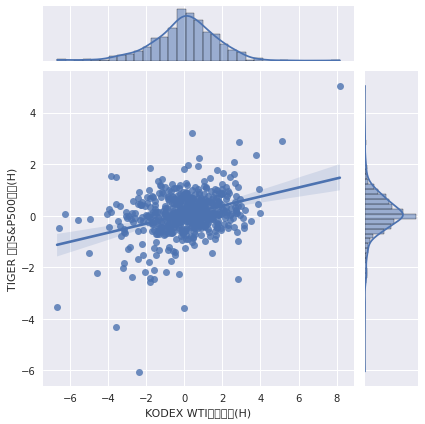

In [ ]:
import seaborn as sns

with plt.style.context('seaborn'):
    sns.jointplot('KODEX WTI원유선물(H)','TIGER 미국S&P500선물(H)', data=ret1, kind='reg')

In [ ]:
ret1= ret1.rename(columns={'KODEX WTI원유선물(H)':'wti','TIGER 미국S&P500선물(H)':'tiger'})
from statsmodels.formula.api import ols
daily_ols = ols('wti~tiger', data=ret1).fit()
daily_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wti   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     74.16
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           7.18e-17
Time:                        11:53:31   Log-Likelihood:                -1059.2
No. Observations:                 568   AIC:                             2122.
Df Residuals:                     566   BIC:                             2131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0038      0.066      0.058      0.954      -0.125       0.133
tiger          0.6611      0.077      8.611      0.000       0.510       0.812
==============================================================================
Omnibus:                       36.899   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.701
Skew:                          -0.492   Prob(JB):                     8.03e-13
Kurtosis:                       4.178   Cond. No.                         1.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
retMonthly1 = ret1.asfreq("M", method='bfill')

monthly_ols = ols('wti~tiger', data = retMonthly1).fit()
monthly_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wti   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.6643
Date:                Thu, 21 Apr 2022   Prob (F-statistic):              0.422
Time:                        11:53:32   Log-Likelihood:                -50.129
No. Observations:                  28   AIC:                             104.3
Df Residuals:                      26   BIC:                             106.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1192      0.285      0.418      0.679      -0.467       0.705
tiger          0.3176      0.390      0.815      0.422      -0.483       1.119
==============================================================================
Omnibus:                        3.831   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                2.542
Skew:                          -0.721   Prob(JB):                        0.281
Kurtosis:                       3.312   Cond. No.                         1.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0.98, "wti's Monthly Alpha & Beta")

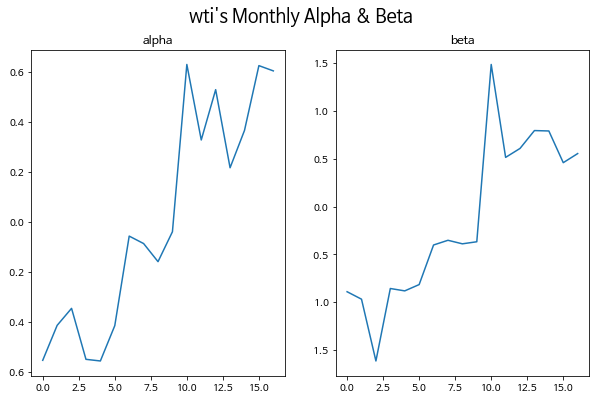

In [ ]:
coefs_a = []
coefs_b = []

j=12
while j <= len(retMonthly1):
   df = retMonthly1.iloc[j-12:j, :]
   coefs = ols('wti~tiger', data=df).fit().params
   coefs_a.append(coefs[0])
   coefs_b.append(coefs[1])
   j += 1
  
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].plot(coefs_a)
ax[0].set_title('alpha')
ax[1].plot(coefs_b)
ax[1].set_title('beta')
plt.suptitle("wti's Monthly Alpha & Beta", fontsize=18)

In [ ]:
holding_periods=1
n_term=252 

returns_wti = data_wti.pct_change(holding_periods).iloc[holding_periods:] 
exp_rets_wti = returns_wti.mean() * n_term
cov_mat_wti = returns_wti.cov() * n_term
corr_mat_wti = returns_wti.corr()

<Figure size 7200x7200 with 0 Axes>

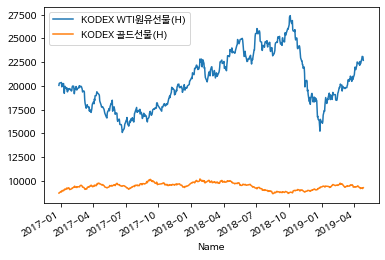

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(100, 100))
data_wti.plot()

<Figure size 7200x7200 with 0 Axes>

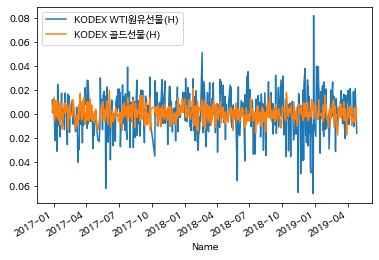

In [ ]:
plt.figure(figsize=(100, 100))
returns_wti.plot()

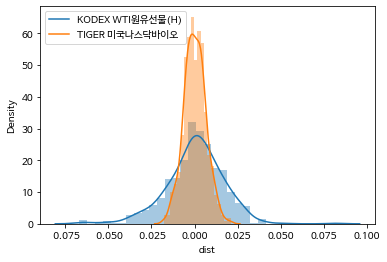

In [ ]:
import seaborn as sns
sns.distplot(returns_wti['KODEX WTI원유선물(H)'])
sns.distplot(returns_wti['KODEX 골드선물(H)'])
plt.xlabel('dist')
plt.legend(labels = ['KODEX WTI원유선물(H)','TIGER 미국나스닥바이오'],loc = 'upper left')
plt.show()

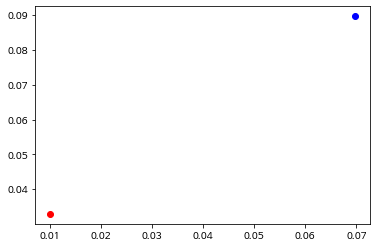

In [ ]:

wti_var = returns_wti.var() * n_term
plt.scatter(wti_var[0],exp_rets_wti[0],color = 'blue')
plt.scatter(wti_var[1],exp_rets_wti[1],color = 'red')
plt.show()

In [ ]:
holding_periods=1
n_term = 252

returns_wti = data_wti.pct_change(holding_periods).iloc[holding_periods:] 

exp_rets_wti = returns_wti.mean() * n_term 
cov_mat_wti = returns_wti.cov() * n_term 
corr_mat_wti = returns_wti.corr() 

In [ ]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
    n = len(cov_mat)

    # Objective function
    # min (1/2)*w.T*P*w
    P = opt.matrix(cov_mat.values) 
    q = opt.matrix(0.0, (n, 1))


    # Constraints Gw <= h
    # exp_rets*w >= target_ret and w >= 0
    G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
    h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

    # Constraints Aw = b
    # sum(w) = 1
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Solve
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)

    # Put weights into a labeled series
    w = pd.Series(sol['x'], index=cov_mat.index)

    return w

In [ ]:
max_risk=0.5
max_ret = exp_rets_wti.max()
min_ret = exp_rets_wti[exp_rets_wti > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks_wti = []
rets_wti = []
weights_wti = []

for step in range(0, n_step+1):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_wti, exp_rets_wti, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat_wti), _w))

    if risk > max_risk:
        break

    risks_wti.append(risk)
    ret = np.dot(exp_rets_wti, _w)
    rets_wti.append(ret)
    weights_wti.append(_w)


In [ ]:
min_risk_wti_idx = np.argmin(risks_wti)
min_risk_wti = risks_wti[min_risk_wti_idx] 
min_risk_ret_wti = rets_wti[min_risk_wti_idx]
min_risk_weight_wti = weights_wti[min_risk_wti_idx]
print("Risk of minimum variance portfolio : ", min_risk_wti)
print("Return of minimum variance portfolio : ", min_risk_ret_wti)
print("Weight of minimum variance portfolio :  ")
print(min_risk_weight_wti)

Risk of minimum variance portfolio :  0.09638711268338665
Return of minimum variance portfolio :  0.03862025722257145
Weight of minimum variance portfolio :  
KODEX WTI원유선물(H)    0.101198
KODEX 골드선물(H)       0.898802
dtype: float64


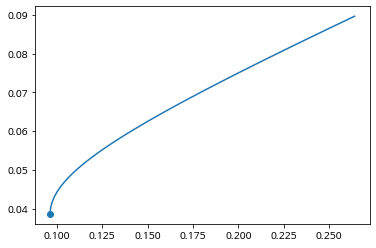

In [ ]:
plt.plot(risks_wti, rets_wti)
plt.scatter(min_risk_wti, min_risk_ret_wti)
plt.show()

In [ ]:
rf_rate = 0.005

slopes_wti = []

# ToDo
for i in range(len(rets_wti)):
    slope_ = (rets_wti[i] - rf_rate) / risks_wti[i]
    slopes_wti.append(slope_)

max_tangency_wti_idx = np.argmax(slopes_wti)
max_tangency_wti = slopes_wti[max_tangency_wti_idx]

In [ ]:
max_tangency_risk_wti = risks_wti[max_tangency_wti_idx]
max_tangency_return_wti = rets_wti[max_tangency_wti_idx]
max_tangency_weight_wti = weights_wti[max_tangency_wti_idx]

print("Risk of tangency portfolio : ", max_tangency_risk_wti)
print("Return of tangency portfolio : ", max_tangency_return_wti)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_wti - rf_rate) / max_tangency_risk_wti)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_wti)

Risk of tangency portfolio :  0.11201425472965229
Return of tangency portfolio :  0.050480858614555264
Sharpe ratio of tangency portfolio :  0.4060274178882308
Weight of minimum variance portfolio : 
KODEX WTI원유선물(H)    0.310001
KODEX 골드선물(H)       0.689999
dtype: float64


In [ ]:
ys_wti = []
for i in range(len(risks_wti)):
    ys_wti.append(max_tangency_wti * risks_wti[i] + rf_rate)

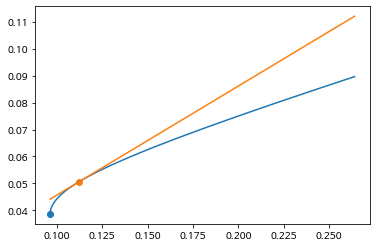

In [ ]:
plt.plot(risks_wti, rets_wti)
plt.plot(risks_wti, ys_wti)
plt.scatter(min_risk_wti, min_risk_ret_wti)
plt.scatter(max_tangency_risk_wti, max_tangency_return_wti)
plt.show()

In [ ]:
fin_w_f = list(np.arange(0,1.01,0.05))
fin_w_r = list(reversed(fin_w_f))


fin_ret_wti = []
fin_risk_wti =[]

for i in range(len(fin_w_f)):
  ret = 0.005*fin_w_f[i] + fin_w_r[i] * float(max_tangency_return_wti)
  risk = fin_w_r[i]*max_tangency_risk_wti
  fin_ret_wti.append(round(ret,3))
  fin_risk_wti.append(round(risk,3))

fin_wti_port = pd.DataFrame([fin_w_f,fin_w_r,fin_ret_wti,fin_risk_wti]).T
fin_wti_port.columns = ['free_weight','risk_weight','wtiport_ret','wtiport_risk']


In [ ]:
fin_wti_port

,free_weight,risk_weight,wtiport_ret,wtiport_risk
0,0.00,1.00,0.050,0.112
1,0.05,0.95,0.048,0.106
2,0.10,0.90,0.046,0.101
3,0.15,0.85,0.044,0.095
4,0.20,0.80,0.041,0.090
5,0.25,0.75,0.039,0.084
6,0.30,0.70,0.037,0.078
7,0.35,0.65,0.035,0.073
8,0.40,0.60,0.032,0.067
9,0.45,0.55,0.030,0.062


In [ ]:
data_wti = data_wti['2017-04-26':]

In [ ]:
def create_data(data):
    
    result = data.pct_change(20).iloc[20:]
    
    returns = result
    avg_rets = returns.mean()*12
    cov_mat = returns.cov()*12
    

    return returns, cov_mat, avg_rets

In [ ]:
def tangency_portfolio(cov_mat, exp_rets, target_ret, min_rets, max_rets, rf_rate = 0.01):
    
    n = len(cov_mat)
    P = opt.matrix(cov_mat.values)
    q = opt.matrix(0.0, (n, 1))
    
    tangency_queue = []
    weights_queue = []
    return_queue = []
    cov_queue = []
    
    step = (max_rets - min_rets)/100
    for i in range(100):
                
        try:
        
            target_ret = min_rets + (i * step)

            # Constraints Gx <= h

            G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
            h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

            # Constraints Ax = b
            # sum(x) = 1
            A = opt.matrix(1.0, (1, n))
            b = opt.matrix(1.0)

            solvers.options['show_progress'] = False
            sol = solvers.qp(P, q, G, h, A, b)

            if sol['status'] != 'optimal':
                pass

            # Put weights into a labeled series
            weights = pd.Series(sol['x'], index=cov_mat.index)
            
            tangency_ = (np.dot(exp_rets, weights) - rf_rate) / np.sqrt(np.dot(np.dot(weights, cov_mat), weights))
            tangency_queue.append(tangency_)
            weights_queue.append(weights)
            return_queue.append(np.dot(exp_rets, weights))
            cov_queue.append(np.sqrt(np.dot(np.dot(weights, cov_mat), weights)))
        
        except:
            pass

    
    tan_index = tangency_queue.index(max(tangency_queue))
    
    weights = weights_queue[tan_index]

    return weights 

In [ ]:
ret = data_wti.pct_change().iloc[1:]

In [ ]:
data_wti.shape

(487, 2)

In [ ]:
def back_test(data, ret):

    # Window_size는 tangency portfolio를 구할 때 이전 몇 달의 데이터를 사용할 것인지 나타낸다.
    total_days = data.shape[0]
    
    # Rebalancing을 한 달마다 진행하는 경우, 'M'으로 rebalance_period는 20이 된다.
    rebalance_period = 20 # 3개월에 한번 = 분기당 한번
    window_size = 120 # 지난 6개월

    returns, cov_mat, avg_rets= create_data(data)
    
    # n_rebalance : 총 몇 번의 리밸런싱을 하게 되는지?
    n_rebalance = (total_days - window_size) // rebalance_period
    w = []
    rebalancing_date=[]
    original_weights = []
    
    rebal = 60
    for i in range(window_size, total_days):
        # 리밸런싱을 할 때 마다 Tangency portfolio weight를 새로 구해야 한다.
        # 이때 리밸런싱 시점 이전의 총 120일 간의 데이터를 사용한다.
        
        if rebal % rebalance_period == 0:
            #print('rebalance')
            _returns, _cov_mat, _avg_rets= create_data(data[(i-window_size):i])
            rebalancing_date.append(data.index[i:i+1]) # rebalance_period 씩 늘려가자
            rebal = 0
            _target_ret = _avg_rets.quantile(0.7)
            _min_ret = _avg_rets.min()
            _max_ret = _avg_rets.max()
            _w = tangency_portfolio(_cov_mat, _avg_rets, _target_ret, _min_ret, _max_ret)
            print(n_rebalance)
            n_rebalance = n_rebalance - 1
            print(_w)
            _w.plot.bar()
            plt.show()
            plt.close()
            _w = np.asarray(_w.values) #np.array([0.0, 0.0, 1.0, 0.0, 0.0])
            w.append(_w)
            

        rebal = rebal + 1
        
    
    price = data
    price = np.array(price)
    
    port = [] # 여기에 날마다 변하는 Portfolio value를 저장한다.
    port_date = [] # 여기에 portfolio의 data를 저장한다.
    portfolio_value = 10000
    port_each_money = [] # 그 날의 portfolio의 구성이다. Ex) 만약 Asset1에 6000원, Asset2에 4000원, 나머지에 0원이 있다면 [6000, 4000, 0, 0, 0]이 된다.
    
    rebal = 60
    j = 0
    for i in range(window_size, total_days):
        
        if i == window_size: # 초기화
            port_each_money = portfolio_value * w[j]
            rebal = 1
            # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
            portfolio_value = port_each_money.sum()
            # port에 portfolio_value를 저장하여 준다.
            port.append(portfolio_value)
            j = j+1


        else:
            #각 날마다 자산의 가격이 바뀌므로, port_each_money 변화한다.
            port_each_money = port_each_money * (1+ret.iloc[i])
            portfolio_value = port_each_money.sum()
            if rebal % rebalance_period == 0:
                rebal = 0
                # 리밸런싱을 하는 날이다. Portfolio value를 새로운 tangency portfolio weight로 맞춰준다.
                port_each_money = portfolio_value * w[j]
                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                j = j+1
            
            else:
                # 리밸런싱 날짜가 아닌 평범함 날짜. 
                # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
            
        rebal = rebal + 1
        port_date.append(data.index[i:i+1][0])
    
    portfolio = pd.DataFrame(port, columns = ['portfolio_value'], index = port_date)
    
    return w, portfolio, rebalancing_date

In [ ]:
data_wti

,KODEX WTI원유선물(H),KODEX 골드선물(H)
Name,,
2017-04-26,17810.0,9570.0
2017-04-27,17770.0,9585.0
2017-04-28,17815.0,9620.0
2017-05-02,17535.0,9500.0
2017-05-04,17150.0,9370.0
...,...,...
2019-04-22,22870.0,9275.0
2019-04-23,23110.0,9220.0
2019-04-24,23080.0,9200.0


In [ ]:
ret

,KODEX WTI원유선물(H),KODEX 골드선물(H)
Name,,
2017-04-27,-0.002246,0.001567
2017-04-28,0.002532,0.003652
2017-05-02,-0.015717,-0.012474
2017-05-04,-0.021956,-0.013684
2017-05-08,-0.023324,-0.005870
...,...,...
2019-04-22,0.020754,0.003788
2019-04-23,0.010494,-0.005930
2019-04-24,-0.001298,-0.002169


18
KODEX WTI원유선물(H)    0.220001
KODEX 골드선물(H)       0.779999
dtype: float64


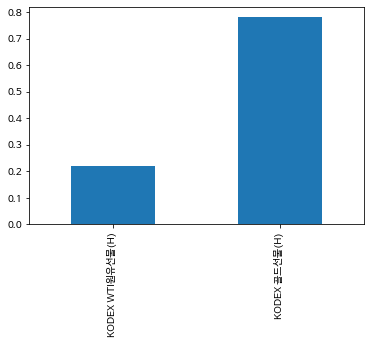

17
KODEX WTI원유선물(H)    0.810001
KODEX 골드선물(H)       0.189999
dtype: float64


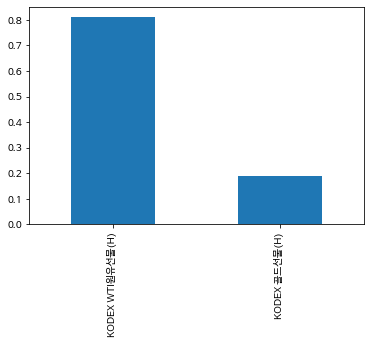

16
KODEX WTI원유선물(H)    0.620003
KODEX 골드선물(H)       0.379997
dtype: float64


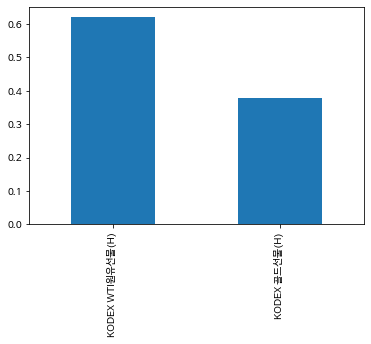

15
KODEX WTI원유선물(H)    0.83
KODEX 골드선물(H)       0.17
dtype: float64


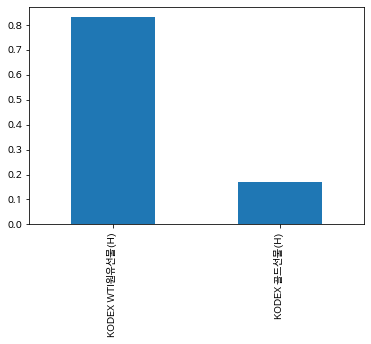

14
KODEX WTI원유선물(H)    0.99
KODEX 골드선물(H)       0.01
dtype: float64


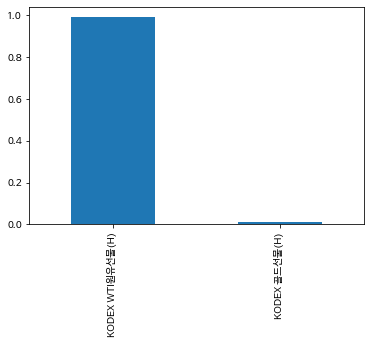

13
KODEX WTI원유선물(H)    0.99
KODEX 골드선물(H)       0.01
dtype: float64


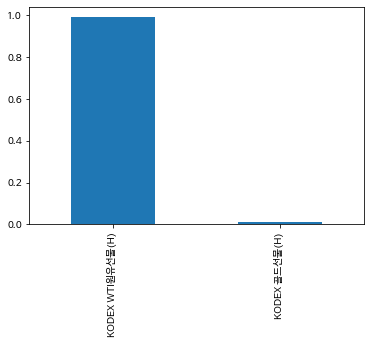

12
KODEX WTI원유선물(H)    0.99
KODEX 골드선물(H)       0.01
dtype: float64


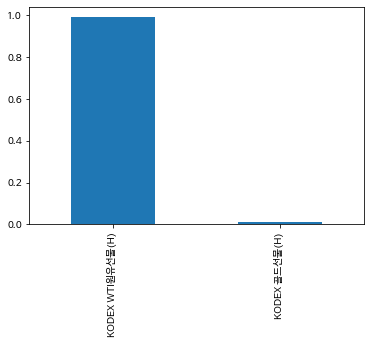

11
KODEX WTI원유선물(H)    0.99
KODEX 골드선물(H)       0.01
dtype: float64


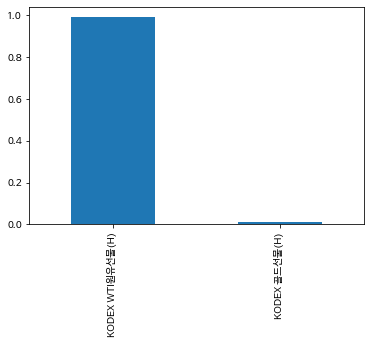

10
KODEX WTI원유선물(H)    0.99
KODEX 골드선물(H)       0.01
dtype: float64


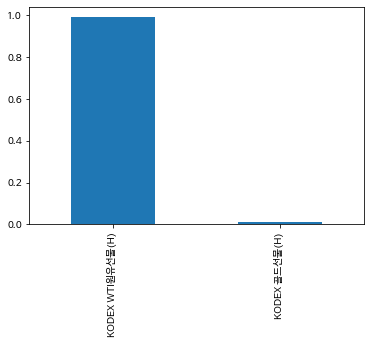

9
KODEX WTI원유선물(H)    0.99
KODEX 골드선물(H)       0.01
dtype: float64


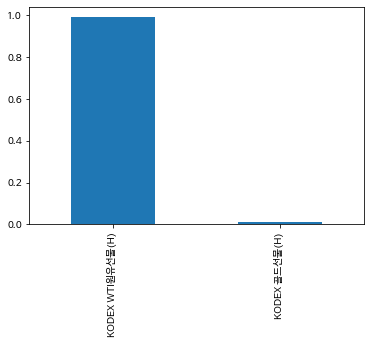

8
KODEX WTI원유선물(H)    0.99
KODEX 골드선물(H)       0.01
dtype: float64


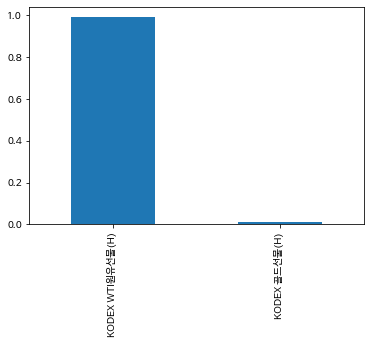

7
KODEX WTI원유선물(H)    0.99
KODEX 골드선물(H)       0.01
dtype: float64


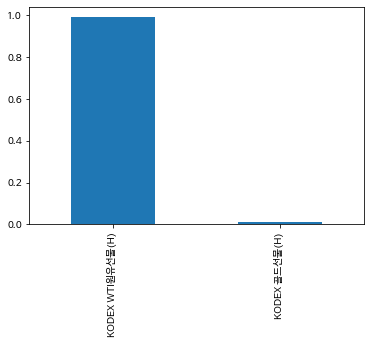

6
KODEX WTI원유선물(H)    0.99
KODEX 골드선물(H)       0.01
dtype: float64


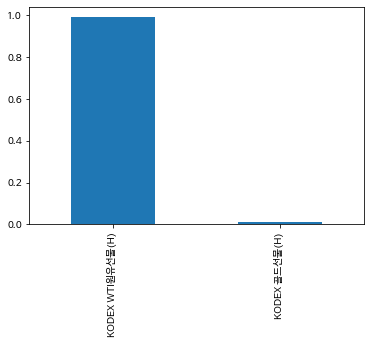

5
KODEX WTI원유선물(H)    0.99
KODEX 골드선물(H)       0.01
dtype: float64


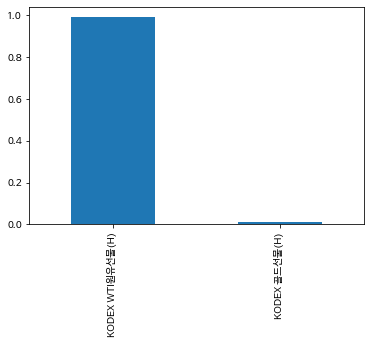

4
KODEX WTI원유선물(H)    0.01
KODEX 골드선물(H)       0.99
dtype: float64


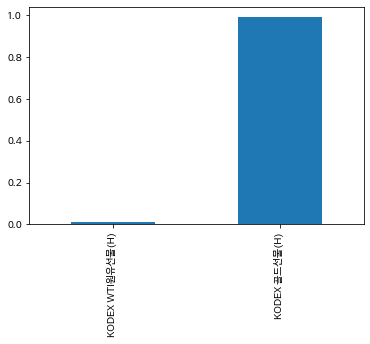

3
KODEX WTI원유선물(H)    0.01
KODEX 골드선물(H)       0.99
dtype: float64


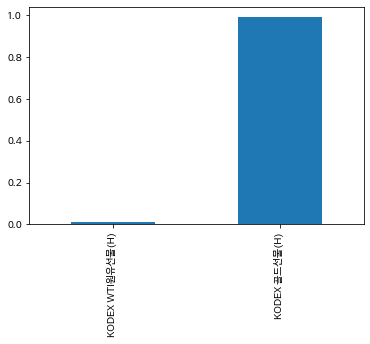

2
KODEX WTI원유선물(H)    0.006558
KODEX 골드선물(H)       0.993442
dtype: float64


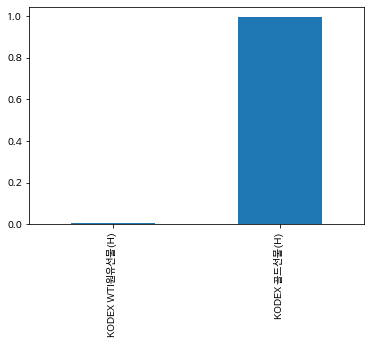

1
KODEX WTI원유선물(H)    0.009999
KODEX 골드선물(H)       0.990001
dtype: float64


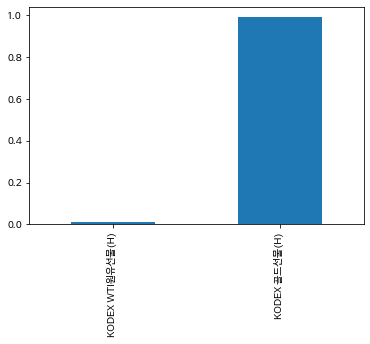

0
KODEX WTI원유선물(H)    0.03
KODEX 골드선물(H)       0.97
dtype: float64


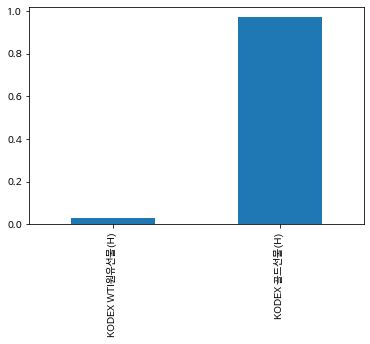

In [ ]:
w, portfolio_wti, rebalancing_date_wti = back_test(data_wti[1:], ret)

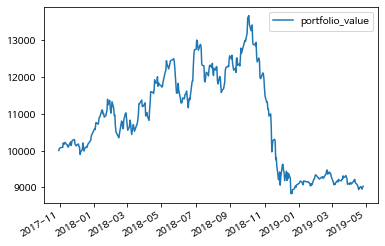

In [ ]:
portfolio_wti.plot()

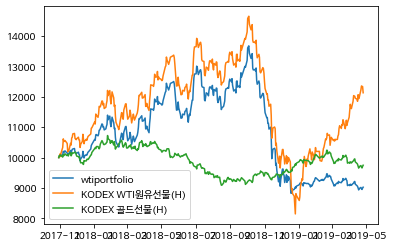

In [ ]:
# Backtest Result Plotting
plt.plot(portfolio_wti, label="wtiportfolio")

for symbol in ['KODEX WTI원유선물(H)', 'KODEX 골드선물(H)']:
    plt.plot(data_wti[121:][symbol] * 10000 / data_wti[121:][symbol][0], label='{}'.format(symbol))

plt.legend()
plt.show()

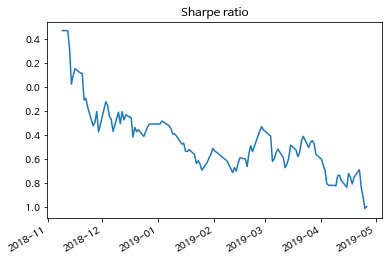

In [ ]:
# Sharpe Ratio 계산

new_port_wti = portfolio_wti
new_port_wti['returns'] = new_port_wti['portfolio_value'].pct_change(1)

# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    rf_rate = 0.01
    return (y.mean()*252 - rf_rate) / (y.std()*np.sqrt(252))

# Calculate rolling Sharpe ratio
new_port_wti['rs'] = new_port_wti['returns'].rolling(252).apply(my_rolling_sharpe)

new_port_wti['rs'][252:].plot()
plt.title('Sharpe ratio')
plt.show()

In [ ]:
portfolio_wti.values[-1][0]

9025.967959334443

# LB


In [ ]:
abs(corr_mat['KBSTAR 모멘텀로우볼']).sort_values()

ARIRANG 단기유동성              0.015066
KINDEX 골드선물 인버스2X(합성 H)    0.030071
KINDEX 골드선물 레버리지(합성 H)     0.030547
ARIRANG 단기우량채권             0.031634
TIGER 금은선물(H)              0.040172
                             ...   
KBSTAR 200선물레버리지           0.906696
KODEX 200                  0.906747
TIGER 200선물레버리지            0.921785
KOSEF 코스피100               0.925931
KBSTAR 모멘텀로우볼              1.000000
Name: KBSTAR 모멘텀로우볼, Length: 241, dtype: float64

In [ ]:
corr_mat['KBSTAR 모멘텀로우볼'].sort_values()

TIGER 200선물인버스2X     -0.905799
KODEX 200선물인버스2X     -0.904648
ARIRANG 200선물인버스2X   -0.904513
KBSTAR 200선물인버스2X    -0.903988
TIGER 인버스            -0.903207
                        ...   
KBSTAR 200선물레버리지      0.906696
KODEX 200             0.906747
TIGER 200선물레버리지       0.921785
KOSEF 코스피100          0.925931
KBSTAR 모멘텀로우볼         1.000000
Name: KBSTAR 모멘텀로우볼, Length: 241, dtype: float64

In [ ]:
corr_mat['KBSTAR 모멘텀로우볼']['TIGER 인버스']

-0.9032074695083265

In [ ]:
data_lb = data[['KBSTAR 모멘텀로우볼','KODEX 코스피']]
data_lb= data_lb.dropna()
data_lb

,KBSTAR 모멘텀로우볼,KODEX 코스피
Name,,
2016-10-14,9447.0,19656.0
2016-10-17,9539.0,19700.0
2016-10-18,9544.0,19753.0
2016-10-19,9665.0,19826.0
2016-10-20,9665.0,19792.0
...,...,...
2019-04-22,11665.0,22680.0
2019-04-23,11690.0,22675.0
2019-04-24,11640.0,22475.0


In [ ]:
df_ex = data[['KBSTAR 모멘텀로우볼','KODEX 코스피']]
df_ex = df_ex.dropna(axis=0)
ret = (df_ex.pct_change())*100
ret = ret.dropna()
ret.head()

,KBSTAR 모멘텀로우볼,KODEX 코스피
Name,,
2016-10-17,0.973854,0.223850
2016-10-18,0.052416,0.269036
2016-10-19,1.267812,0.369564
2016-10-20,0.000000,-0.171492
2016-10-21,-0.496637,-0.318310


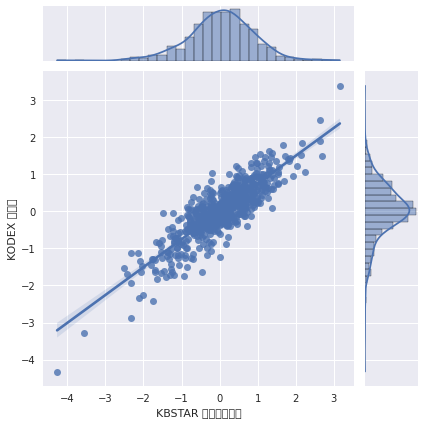

In [ ]:
import seaborn as sns

with plt.style.context('seaborn'):
    sns.jointplot('KBSTAR 모멘텀로우볼','KODEX 코스피', data=ret, kind='reg')

In [ ]:
ret= ret.rename(columns={'KBSTAR 모멘텀로우볼':'mlb','KODEX 코스피':'kospi'})
from statsmodels.formula.api import ols
daily_ols = ols('mlb~kospi', data=ret).fit()
daily_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mlb   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          2.36e-184
Time:                        11:57:44   Log-Likelihood:                -366.20
No. Observations:                 620   AIC:                             736.4
Df Residuals:                     618   BIC:                             745.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0140      0.018      0.799      0.425      -0.020       0.049
kospi          0.9900      0.023     42.241      0.000       0.944       1.036
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.101
Skew:                          -0.079   Prob(JB):                        0.577
Kurtosis:                       3.134   Cond. No.                         1.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
retMonthly = ret.asfreq("M", method='bfill')

monthly_ols = ols('mlb~kospi', data = retMonthly).fit()
monthly_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mlb   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     79.71
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           1.10e-09
Time:                        11:57:44   Log-Likelihood:                -20.286
No. Observations:                  30   AIC:                             44.57
Df Residuals:                      28   BIC:                             47.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0373      0.090      0.415      0.681      -0.147       0.222
kospi          0.8880      0.099      8.928      0.000       0.684       1.092
==============================================================================
Omnibus:                        2.980   Durbin-Watson:                   2.688
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                1.880
Skew:                           0.598   Prob(JB):                        0.391
Kurtosis:                       3.272   Cond. No.                         1.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0.98, "mlb's Monthly Alpha & Beta")

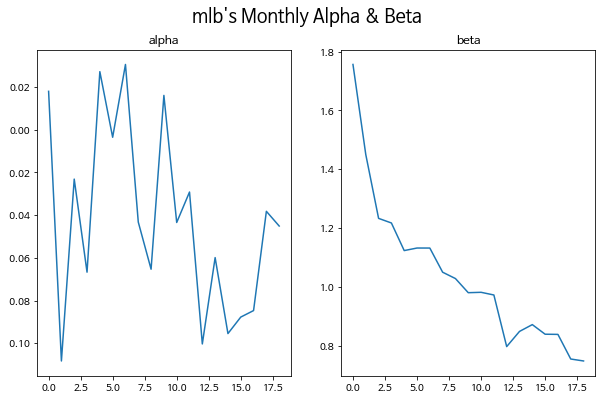

In [ ]:
coefs_a = []
coefs_b = []

j=12
while j <= len(retMonthly):
   df = retMonthly.iloc[j-12:j, :]
   coefs = ols('mlb~kospi', data=df).fit().params
   coefs_a.append(coefs[0])
   coefs_b.append(coefs[1])
   j += 1
  
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].plot(coefs_a)
ax[0].set_title('alpha')
ax[1].plot(coefs_b)
ax[1].set_title('beta')
plt.suptitle("mlb's Monthly Alpha & Beta", fontsize=18)

In [ ]:
data_mlb = data[['KBSTAR 모멘텀로우볼','TIGER 인버스']]
data_mlb= data_mlb.dropna()
data_mlb

,KBSTAR 모멘텀로우볼,TIGER 인버스
Name,,
2016-10-14,9447.0,8360.0
2016-10-17,9539.0,8345.0
2016-10-18,9544.0,8290.0
2016-10-19,9665.0,8275.0
2016-10-20,9665.0,8270.0
...,...,...
2019-04-22,11665.0,7220.0
2019-04-23,11690.0,7205.0
2019-04-24,11640.0,7280.0


In [ ]:
holding_periods=1
n_term=252 

returns_mlb = data_mlb.pct_change(holding_periods).iloc[holding_periods:] 
exp_rets_mlb = returns_mlb.mean() * n_term
cov_mat_mlb = returns_mlb.cov() * n_term
corr_mat_mlb = returns_mlb.corr()

<Figure size 7200x7200 with 0 Axes>

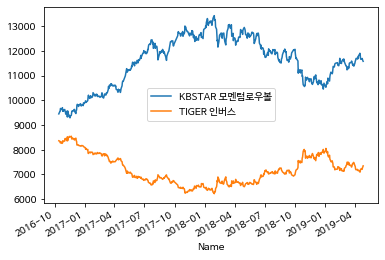

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(100, 100))
data_mlb.plot()

<Figure size 7200x7200 with 0 Axes>

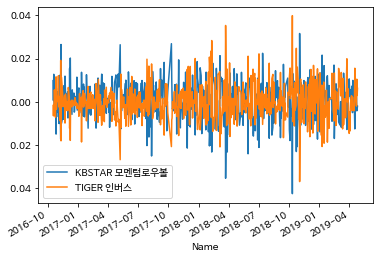

In [ ]:
plt.figure(figsize=(100, 100))
returns_mlb.plot()

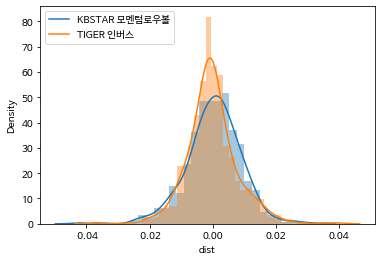

In [ ]:
import seaborn as sns
sns.distplot(returns_mlb['KBSTAR 모멘텀로우볼'])
sns.distplot(returns_mlb['TIGER 인버스'])
plt.xlabel('dist')
plt.legend(labels = ['KBSTAR 모멘텀로우볼','TIGER 인버스'],loc = 'upper left')
plt.show()


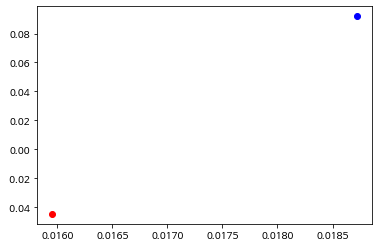

In [ ]:
mlb_var = returns_mlb.var() * n_term
plt.scatter(mlb_var[0],exp_rets_mlb[0],color = 'blue')
plt.scatter(mlb_var[1],exp_rets_mlb[1],color = 'red')
plt.show()

In [ ]:
abs(corr_mat['흥국 S&P코리아로우볼']).sort_values()

ARIRANG 단기유동성           0.024534
ARIRANG 단기우량채권          0.042300
KBSTAR 중기우량회사채          0.054961
TIGER 금은선물(H)           0.059021
파워 단기채                  0.059390
                          ...   
ARIRANG 고배당주            0.740980
TIGER 로우볼               0.763902
파워 고배당저변동성              0.766421
ARIRANG 스마트베타 LowVOL    0.770992
흥국 S&P코리아로우볼            1.000000
Name: 흥국 S&P코리아로우볼, Length: 241, dtype: float64

In [ ]:
corr_mat['흥국 S&P코리아로우볼'].sort_values()

KINDEX 인버스             -0.610931
KODEX 인버스              -0.604875
TIGER 인버스              -0.601816
KBSTAR 200선물인버스2X      -0.517245
KODEX 200선물인버스2X       -0.515062
                          ...   
ARIRANG 고배당주            0.740980
TIGER 로우볼               0.763902
파워 고배당저변동성              0.766421
ARIRANG 스마트베타 LowVOL    0.770992
흥국 S&P코리아로우볼            1.000000
Name: 흥국 S&P코리아로우볼, Length: 241, dtype: float64

In [ ]:
corr_mat['흥국 S&P코리아로우볼']['KODEX 미국S&P금융(합성)']

0.1598462141505966

In [ ]:
data_klb = data[['흥국 S&P코리아로우볼','KODEX 코스피']]
data_klb = data_klb.dropna()
data_klb

,흥국 S&P코리아로우볼,KODEX 코스피
Name,,
2015-08-24,9556.0,17520.0
2015-08-25,9556.0,17716.0
2015-08-26,9871.0,18114.0
2015-08-27,9861.0,18291.0
2015-08-28,9993.0,18563.0
...,...,...
2019-04-22,11010.0,22680.0
2019-04-23,11010.0,22675.0
2019-04-24,11010.0,22475.0


In [ ]:
df_ex = data[['흥국 S&P코리아로우볼','KODEX 코스피']]
df_ex1 = df_ex.dropna(axis=0)
ret1 = (df_ex1.pct_change())*100
ret1 = ret1.dropna()
ret1.head()

,흥국 S&P코리아로우볼,KODEX 코스피
Name,,
2015-08-25,0.000000,1.118721
2015-08-26,3.296358,2.246557
2015-08-27,-0.101307,0.977145
2015-08-28,1.338607,1.487070
2015-08-31,0.330231,-0.150838


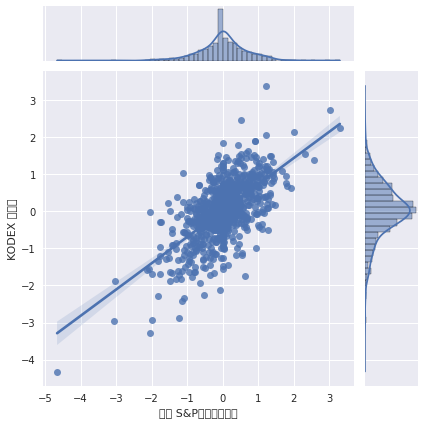

In [ ]:
import seaborn as sns

with plt.style.context('seaborn'):
    sns.jointplot('흥국 S&P코리아로우볼','KODEX 코스피', data=ret1, kind='reg')

In [ ]:
ret1= ret1.rename(columns={'흥국 S&P코리아로우볼':'klb','KODEX 코스피':'kospi'})
from statsmodels.formula.api import ols
daily_ols = ols('klb~kospi', data=ret1).fit()
daily_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    klb   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     627.4
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          2.00e-105
Time:                        11:57:55   Log-Likelihood:                -706.78
No. Observations:                 900   AIC:                             1418.
Df Residuals:                     898   BIC:                             1427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.063e-05      0.018      0.001      0.999      -0.035       0.035
kospi          0.5801      0.023     25.048      0.000       0.535       0.626
==============================================================================
Omnibus:                       24.052   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.995
Skew:                          -0.006   Prob(JB):                     3.11e-12
Kurtosis:                       4.189   Cond. No.                         1.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
retMonthly1 = ret1.asfreq("M", method='bfill')

monthly_ols = ols('klb~kospi', data = retMonthly1).fit()
monthly_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    klb   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     40.24
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           1.27e-07
Time:                        11:57:56   Log-Likelihood:                -29.912
No. Observations:                  44   AIC:                             63.82
Df Residuals:                      42   BIC:                             67.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0579      0.074      0.782      0.439      -0.092       0.207
kospi          0.5171      0.082      6.343      0.000       0.353       0.682
==============================================================================
Omnibus:                        2.329   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                1.349
Skew:                           0.347   Prob(JB):                        0.509
Kurtosis:                       3.503   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0.98, "lb's Monthly Alpha & Beta")

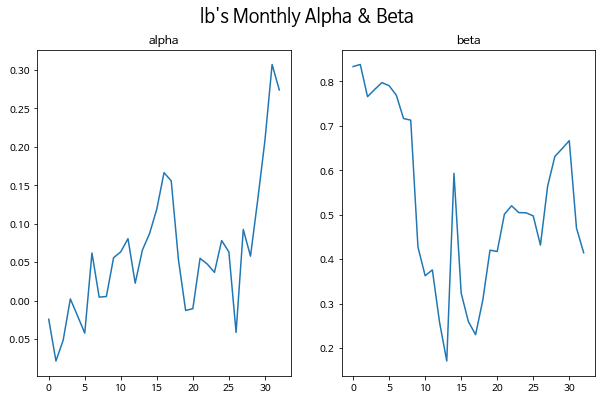

In [ ]:
coefs_a = []
coefs_b = []

j=12
while j <= len(retMonthly1):
   df = retMonthly1.iloc[j-12:j, :]
   coefs = ols('klb~kospi', data=df).fit().params
   coefs_a.append(coefs[0])
   coefs_b.append(coefs[1])
   j += 1
  
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].plot(coefs_a)
ax[0].set_title('alpha')
ax[1].plot(coefs_b)
ax[1].set_title('beta')
plt.suptitle("lb's Monthly Alpha & Beta", fontsize=18)

In [ ]:
holding_periods=1
n_term=252 

returns_klb = data_klb.pct_change(holding_periods).iloc[holding_periods:] 
exp_rets_klb = returns_klb.mean() * n_term
cov_mat_klb= returns_klb.cov() * n_term
corr_mat_klb = returns_klb.corr()

<Figure size 7200x7200 with 0 Axes>

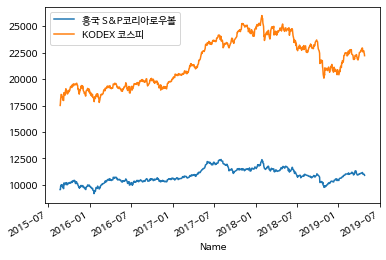

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(100, 100))
data_klb.plot()

In [ ]:
df_ex = data[['KODEX 미국S&P금융(합성)','TIGER 미국S&P500선물(H)']]
df_ex1 = df_ex.dropna(axis=0)
ret1 = (df_ex1.pct_change())*100
ret1 = ret1.dropna()
ret1.head()

,KODEX 미국S&P금융(합성),TIGER 미국S&P500선물(H)
Name,,
2014-06-13,-0.603015,-0.485661
2014-06-16,0.303337,-0.139438
2014-06-17,-0.252016,0.418897
2014-06-18,1.010611,0.231750
2014-06-19,0.250125,0.809249


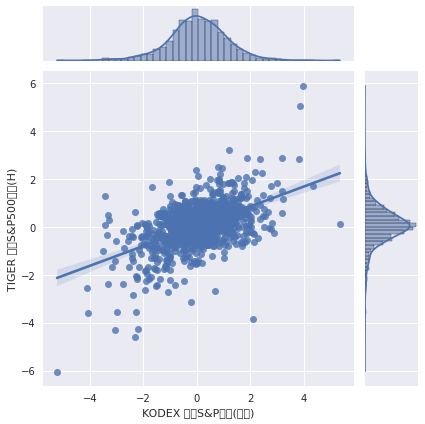

In [ ]:
import seaborn as sns

with plt.style.context('seaborn'):
    sns.jointplot('KODEX 미국S&P금융(합성)','TIGER 미국S&P500선물(H)', data=ret1, kind='reg')

In [ ]:
ret1= ret1.rename(columns={'KODEX 미국S&P금융(합성)':'fin','TIGER 미국S&P500선물(H)':'snp'})
from statsmodels.formula.api import ols
daily_ols = ols('fin~snp', data=ret1).fit()
daily_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fin   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     448.2
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           1.02e-84
Time:                        11:58:07   Log-Likelihood:                -1629.1
No. Observations:                1196   AIC:                             3262.
Df Residuals:                    1194   BIC:                             3272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0201      0.027      0.734      0.463      -0.034       0.074
snp            0.6607      0.031     21.170      0.000       0.599       0.722
==============================================================================
Omnibus:                       64.528   Durbin-Watson:                   2.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.856
Skew:                           0.113   Prob(JB):                     6.68e-49
Kurtosis:                       5.098   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
retMonthly1 = ret1.asfreq("M", method='bfill')

monthly_ols = ols('fin~snp', data = retMonthly1).fit()
monthly_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fin   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     17.04
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           0.000123
Time:                        11:58:09   Log-Likelihood:                -75.469
No. Observations:                  58   AIC:                             154.9
Df Residuals:                      56   BIC:                             159.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1132      0.120      0.944      0.349      -0.127       0.353
snp            0.5949      0.144      4.128      0.000       0.306       0.884
==============================================================================
Omnibus:                        2.227   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.431
Skew:                           0.199   Prob(JB):                        0.489
Kurtosis:                       3.659   Cond. No.                         1.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0.98, "fin's Monthly Alpha & Beta")

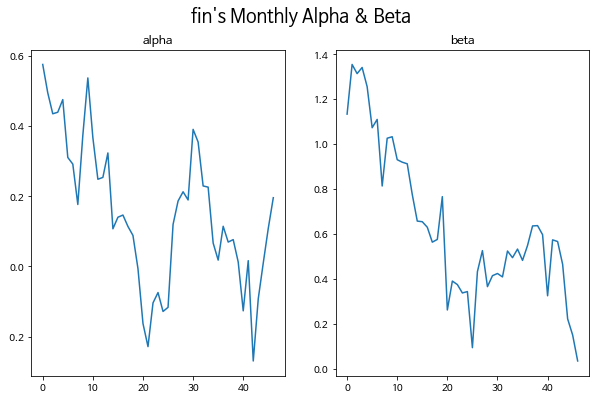

In [ ]:
coefs_a = []
coefs_b = []

j=12
while j <= len(retMonthly1):
   dt = retMonthly1.iloc[j-12:j, :]
   coefs = ols('fin~snp', data=dt).fit().params
   coefs_a.append(coefs[0])
   coefs_b.append(coefs[1])
   j += 1
  
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].plot(coefs_a)
ax[0].set_title('alpha')
ax[1].plot(coefs_b)
ax[1].set_title('beta')
plt.suptitle("fin's Monthly Alpha & Beta", fontsize=18)

In [ ]:
data_klb = data[['흥국 S&P코리아로우볼','KODEX 미국S&P금융(합성)']]
data_klb = data_klb.dropna()
data_klb

,흥국 S&P코리아로우볼,KODEX 미국S&P금융(합성)
Name,,
2015-03-25,9838.0,11535.0
2015-03-26,9800.0,11405.0
2015-03-27,9819.0,11365.0
2015-03-30,9828.0,11375.0
2015-03-31,9918.0,11580.0
...,...,...
2019-04-22,11010.0,16125.0
2019-04-23,11010.0,16195.0
2019-04-24,11010.0,16310.0


In [ ]:

holding_periods=1
n_term=252 

returns_klb = data_klb.pct_change(holding_periods).iloc[holding_periods:] 
exp_rets_klb = returns_klb.mean() * n_term
cov_mat_klb = returns_klb.cov() * n_term
corr_mat_klb = returns_klb.corr()

<Figure size 7200x7200 with 0 Axes>

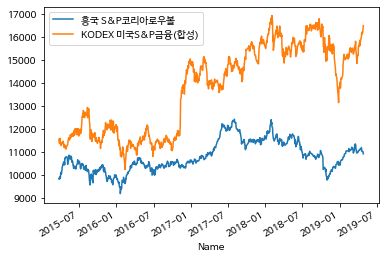

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(100, 100))
data_klb.plot()

<Figure size 7200x7200 with 0 Axes>

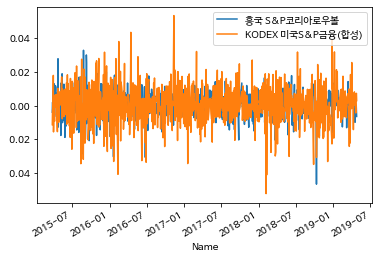

In [ ]:
plt.figure(figsize=(100, 100))
returns_klb.plot()

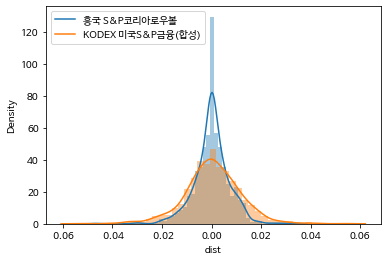

In [ ]:
import seaborn as sns
sns.distplot(returns_klb['흥국 S&P코리아로우볼'])
sns.distplot(returns_klb['KODEX 미국S&P금융(합성)'])
plt.xlabel('dist')
plt.legend(labels = ['흥국 S&P코리아로우볼','KODEX 미국S&P금융(합성)'],loc = 'upper left')
plt.show()


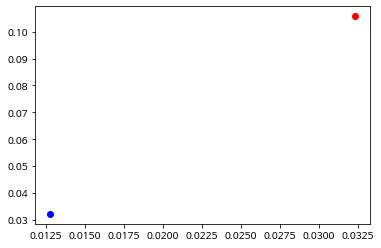

In [ ]:
klb_var = returns_klb.var() * n_term
plt.scatter(klb_var[0],exp_rets_klb[0],color = 'blue')
plt.scatter(klb_var[1],exp_rets_klb[1],color = 'red')
plt.show()

In [ ]:
holding_periods=1
n_term = 252

returns_klb = data_klb.pct_change(holding_periods).iloc[holding_periods:] 

exp_rets_klb = returns_klb.mean() * n_term 
cov_mat_klb = returns_klb.cov() * n_term 
corr_mat_klb = returns_klb.corr() 

In [ ]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
    n = len(cov_mat)

    # Objective function
    # min (1/2)*w.T*P*w
    P = opt.matrix(cov_mat.values) 
    q = opt.matrix(0.0, (n, 1))


    # Constraints Gw <= h
    # exp_rets*w >= target_ret and w >= 0
    G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
    h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

    # Constraints Aw = b
    # sum(w) = 1
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Solve
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)

    # Put weights into a labeled series
    w = pd.Series(sol['x'], index=cov_mat.index)

    return w

In [ ]:
max_risk=0.5
max_ret = exp_rets_klb.max()
min_ret = exp_rets_klb[exp_rets_klb > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks_klb = []
rets_klb = []
weights_klb = []

for step in range(0, n_step+1):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_klb, exp_rets_klb, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat_klb), _w))


    if risk > max_risk:
        break

    risks_klb.append(risk)
    ret = np.dot(exp_rets_klb, _w)
    rets_klb.append(ret)
    weights_klb.append(_w)


In [ ]:
min_risk_klb_idx = np.argmin(risks_klb)
min_risk_klb = risks_klb[min_risk_klb_idx] 
min_risk_ret_klb = rets_klb[min_risk_klb_idx]
min_risk_weight_klb = weights_klb[min_risk_klb_idx]
print("Risk of minimum variance portfolio : ", min_risk_klb)
print("Return of minimum variance portfolio : ", min_risk_ret_klb)
print("Weight of minimum variance portfolio :  ")
print(min_risk_weight_klb)

Risk of minimum variance portfolio :  0.10209850976357923
Return of minimum variance portfolio :  0.05038377863785788
Weight of minimum variance portfolio :  
흥국 S&P코리아로우볼         0.753033
KODEX 미국S&P금융(합성)    0.246967
dtype: float64


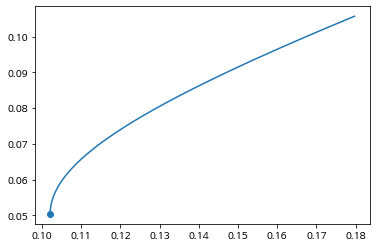

In [ ]:
plt.plot(risks_klb, rets_klb)
plt.scatter(min_risk_klb, min_risk_ret_klb)
plt.show()

In [ ]:
holding_periods=1
n_term=252 

returns_klb = data_klb.pct_change(holding_periods).iloc[holding_periods:] 
exp_rets_klb = returns_klb.mean() * n_term
cov_mat_klb= returns_klb.cov() * n_term
corr_mat_klb = returns_klb.corr()

In [ ]:
rf_rate = 0.005

slopes_klb = []

# ToDo
for i in range(len(rets_klb)):
    slope_ = (rets_klb[i] - rf_rate) / risks_klb[i]
    slopes_klb.append(slope_)

max_tangency_klb_idx = np.argmax(slopes_klb)
max_tangency_klb = slopes_klb[max_tangency_klb_idx]

In [ ]:
max_tangency_risk_klb = risks_klb[max_tangency_klb_idx]
max_tangency_return_klb = rets_klb[max_tangency_klb_idx]
max_tangency_weight_klb = weights_klb[max_tangency_klb_idx]

print("Risk of tangency portfolio : ", max_tangency_risk_klb)
print("Return of tangency portfolio : ", max_tangency_return_klb)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_klb - rf_rate) / max_tangency_risk_klb)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_klb)

Risk of tangency portfolio :  0.13289154722049593
Return of tangency portfolio :  0.08219791016526358
Sharpe ratio of tangency portfolio :  0.5809091080652066
Weight of minimum variance portfolio : 
흥국 S&P코리아로우볼         0.32
KODEX 미국S&P금융(합성)    0.68
dtype: float64


In [ ]:
ys_klb = []
for i in range(len(risks_klb)):
    ys_klb.append(max_tangency_klb * risks_klb[i] + rf_rate)

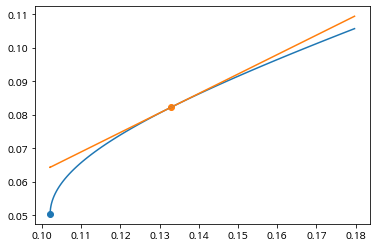

In [ ]:
plt.plot(risks_klb, rets_klb)
plt.plot(risks_klb, ys_klb)
plt.scatter(min_risk_klb, min_risk_ret_klb)
plt.scatter(max_tangency_risk_klb, max_tangency_return_klb)
plt.show()

In [ ]:
fin_w_f = list(np.arange(0,1.01,0.05))
fin_w_r = list(reversed(fin_w_f))


fin_ret_klb = []
fin_risk_klb =[]

for i in range(len(fin_w_f)):
  ret = 0.005*fin_w_f[i] + fin_w_r[i] * float(max_tangency_return_klb)
  risk = fin_w_r[i]*max_tangency_risk_klb
  fin_ret_klb.append(round(ret,3))
  fin_risk_klb.append(round(risk,3))

fin_klb_port = pd.DataFrame([fin_w_f,fin_w_r,fin_ret_klb,fin_risk_klb]).T
fin_klb_port.columns = ['free_weight','risk_weight','klbport_ret','klbport_risk']


In [ ]:
fin_klb_port

,free_weight,risk_weight,klbport_ret,klbport_risk
0,0.00,1.00,0.082,0.133
1,0.05,0.95,0.078,0.126
2,0.10,0.90,0.074,0.120
3,0.15,0.85,0.071,0.113
4,0.20,0.80,0.067,0.106
5,0.25,0.75,0.063,0.100
6,0.30,0.70,0.059,0.093
7,0.35,0.65,0.055,0.086
8,0.40,0.60,0.051,0.080
9,0.45,0.55,0.047,0.073


In [ ]:
data_klb = data_klb['2017-04-26':]

In [ ]:
def create_data(data):
    
    result = data.pct_change(20).iloc[20:]
    
    returns = result
    avg_rets = returns.mean()*12
    cov_mat = returns.cov()*12

    return returns, cov_mat, avg_rets

In [ ]:
def tangency_portfolio(cov_mat, exp_rets, target_ret, min_rets, max_rets, rf_rate = 0.01):
    
    n = len(cov_mat)
    P = opt.matrix(cov_mat.values)
    q = opt.matrix(0.0, (n, 1))
    
    tangency_queue = []
    weights_queue = []
    return_queue = []
    cov_queue = []
    
    step = (max_rets - min_rets)/100
    for i in range(100):
                
        try:
        
            target_ret = min_rets + (i * step)

            # Constraints Gx <= h

            G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
            h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

            # Constraints Ax = b
            # sum(x) = 1
            A = opt.matrix(1.0, (1, n))
            b = opt.matrix(1.0)

            solvers.options['show_progress'] = False
            sol = solvers.qp(P, q, G, h, A, b)

            if sol['status'] != 'optimal':
                pass

            # Put weights into a labeled series
            weights = pd.Series(sol['x'], index=cov_mat.index)
            
            tangency_ = (np.dot(exp_rets, weights) - rf_rate) / np.sqrt(np.dot(np.dot(weights, cov_mat), weights))
            tangency_queue.append(tangency_)
            weights_queue.append(weights)
            return_queue.append(np.dot(exp_rets, weights))
            cov_queue.append(np.sqrt(np.dot(np.dot(weights, cov_mat), weights)))
        
        except:
            pass

    
    tan_index = tangency_queue.index(max(tangency_queue))
    
    weights = weights_queue[tan_index]

    return weights 

In [ ]:
ret = data_klb.pct_change().iloc[1:]

In [ ]:
data_klb.shape

(487, 2)

In [ ]:
def back_test(data, ret):

    # Window_size는 tangency portfolio를 구할 때 이전 몇 달의 데이터를 사용할 것인지 나타낸다.
    total_days = data.shape[0]
    
    # Rebalancing을 한 달마다 진행하는 경우, 'M'으로 rebalance_period는 20이 된다.
    rebalance_period = 60 # 3개월에 한번 = 분기당 한번
    window_size = 120 # 지난 6개월

    returns, cov_mat, avg_rets= create_data(data)
    
    # n_rebalance : 총 몇 번의 리밸런싱을 하게 되는지?
    n_rebalance = (total_days - window_size) // rebalance_period
    w = []
    rebalancing_date=[]
    original_weights = []
    
    rebal = 60
    for i in range(window_size, total_days):
        # 리밸런싱을 할 때 마다 Tangency portfolio weight를 새로 구해야 한다.
        # 이때 리밸런싱 시점 이전의 총 120일 간의 데이터를 사용한다.
        
        if rebal % rebalance_period == 0:
            #print('rebalance')
            _returns, _cov_mat, _avg_rets= create_data(data[(i-window_size):i])
            rebalancing_date.append(data.index[i:i+1]) # rebalance_period 씩 늘려가자
            rebal = 0
            _target_ret = _avg_rets.quantile(0.7)
            _min_ret = _avg_rets.min()
            _max_ret = _avg_rets.max()
            _w = tangency_portfolio(_cov_mat, _avg_rets, _target_ret, _min_ret, _max_ret)
            print(n_rebalance)
            n_rebalance = n_rebalance - 1
            print(_w)
            _w.plot.bar()
            plt.show()
            plt.close()
            _w = np.asarray(_w.values) #np.array([0.0, 0.0, 1.0, 0.0, 0.0])
            w.append(_w)
            

        rebal = rebal + 1
        
    
    price = data
    price = np.array(price)
    
    port = [] # 여기에 날마다 변하는 Portfolio value를 저장한다.
    port_date = [] # 여기에 portfolio의 data를 저장한다.
    portfolio_value = 10000
    port_each_money = [] # 그 날의 portfolio의 구성이다. Ex) 만약 Asset1에 6000원, Asset2에 4000원, 나머지에 0원이 있다면 [6000, 4000, 0, 0, 0]이 된다.
    
    rebal = 60
    j = 0
    for i in range(window_size, total_days):
        
        if i == window_size: # 초기화
            port_each_money = portfolio_value * w[j]
            rebal = 1
            # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
            portfolio_value = port_each_money.sum()
            # port에 portfolio_value를 저장하여 준다.
            port.append(portfolio_value)
            j = j+1


        else:
            #각 날마다 자산의 가격이 바뀌므로, port_each_money 변화한다.
            port_each_money = port_each_money * (1+ret.iloc[i])
            portfolio_value = port_each_money.sum()
            if rebal % rebalance_period == 0:
                rebal = 0
                # 리밸런싱을 하는 날이다. Portfolio value를 새로운 tangency portfolio weight로 맞춰준다.
                port_each_money = portfolio_value * w[j]
                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                j = j+1
            
            else:
                # 리밸런싱 날짜가 아닌 평범함 날짜. 
                # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
            
        rebal = rebal + 1
        port_date.append(data.index[i:i+1][0])
    
    portfolio = pd.DataFrame(port, columns = ['portfolio_value'], index = port_date)
    
    return w, portfolio, rebalancing_date

In [ ]:
data_klb

,흥국 S&P코리아로우볼,KODEX 미국S&P금융(합성)
Name,,
2017-04-26,11182.0,14100.0
2017-04-27,11207.0,14155.0
2017-04-28,11172.0,14035.0
2017-05-02,11172.0,13990.0
2017-05-04,11275.0,14040.0
...,...,...
2019-04-22,11010.0,16125.0
2019-04-23,11010.0,16195.0
2019-04-24,11010.0,16310.0


In [ ]:
ret

,흥국 S&P코리아로우볼,KODEX 미국S&P금융(합성)
Name,,
2017-04-27,0.002236,0.003901
2017-04-28,-0.003123,-0.008478
2017-05-02,0.000000,-0.003206
2017-05-04,0.009219,0.003574
2017-05-08,0.009135,0.004274
...,...,...
2019-04-22,0.000000,-0.004322
2019-04-23,0.000000,0.004341
2019-04-24,0.000000,0.007101


6
흥국 S&P코리아로우볼         0.01
KODEX 미국S&P금융(합성)    0.99
dtype: float64


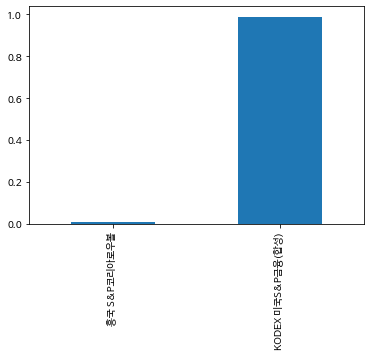

5
흥국 S&P코리아로우볼         0.01
KODEX 미국S&P금융(합성)    0.99
dtype: float64


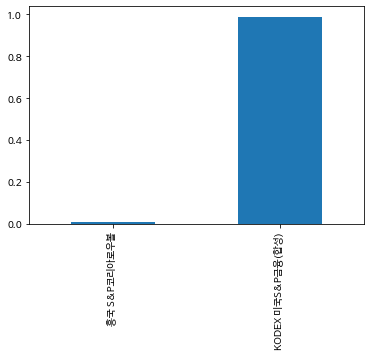

4
흥국 S&P코리아로우볼         0.01
KODEX 미국S&P금융(합성)    0.99
dtype: float64


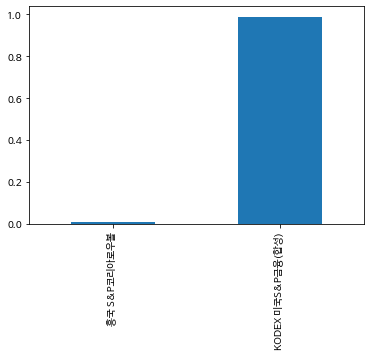

3
흥국 S&P코리아로우볼         0.01
KODEX 미국S&P금융(합성)    0.99
dtype: float64


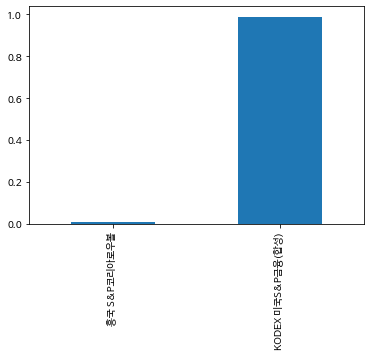

2
흥국 S&P코리아로우볼         0.01
KODEX 미국S&P금융(합성)    0.99
dtype: float64


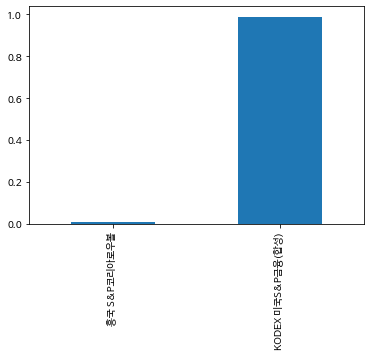

1
흥국 S&P코리아로우볼         0.99
KODEX 미국S&P금융(합성)    0.01
dtype: float64


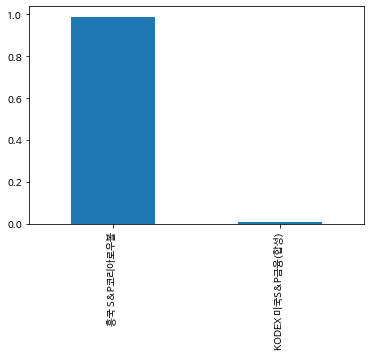

0
흥국 S&P코리아로우볼         0.99
KODEX 미국S&P금융(합성)    0.01
dtype: float64


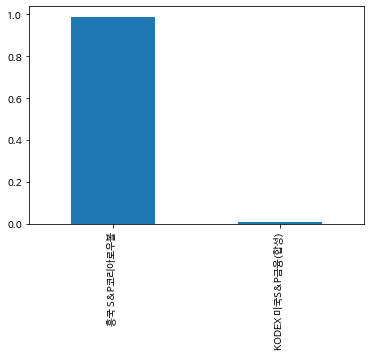

In [ ]:
w_klb , portfolio_klb, rebalancing_date_klb = back_test(data_klb[1:], ret)

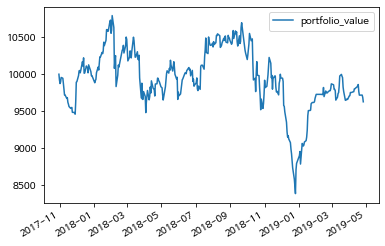

In [ ]:
portfolio_klb.plot()

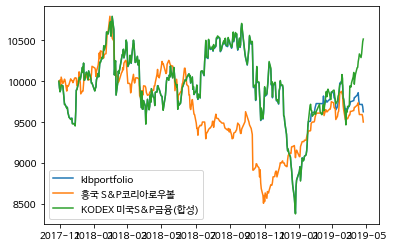

In [ ]:
# Backtest Result Plotting
plt.plot(portfolio_klb, label="klbportfolio")

for symbol in ['흥국 S&P코리아로우볼', 'KODEX 미국S&P금융(합성)']:
    plt.plot(data_klb[121:][symbol] * 10000 / data_klb[121:][symbol][0], label='{}'.format(symbol))

plt.legend()
plt.show()

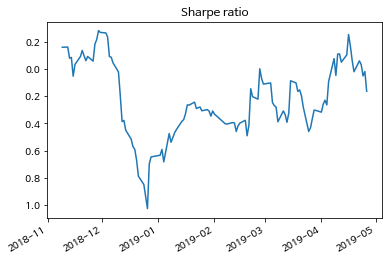

In [ ]:
# Sharpe Ratio 계산

new_port_klb = portfolio_klb
new_port_klb['returns'] = new_port_klb['portfolio_value'].pct_change(1)

# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    rf_rate = 0.01
    return (y.mean()*252 - rf_rate) / (y.std()*np.sqrt(252))

# Calculate rolling Sharpe ratio
new_port_klb['rs'] = new_port_klb['returns'].rolling(252).apply(my_rolling_sharpe)

new_port_klb['rs'][252:].plot()
plt.title('Sharpe ratio')
plt.show()

In [ ]:
portfolio_klb.values[-1][0]

9627.55702428477

# TA

In [ ]:
abs(corr_mat['KODEX 턴어라운드투자']).sort_values()

KINDEX 골드선물 레버리지(합성 H)     0.001591
KINDEX 골드선물 인버스2X(합성 H)    0.002007
KODEX 골드선물(H)              0.009368
ARIRANG 단기유동성              0.010960
TIGER 금은선물(H)              0.016839
                             ...   
KODEX 가치투자                 0.773821
ARIRANG 스마트베타 Value        0.775798
TIGER 우량가치                 0.784740
KOSEF 저PBR가중               0.831922
KODEX 턴어라운드투자              1.000000
Name: KODEX 턴어라운드투자, Length: 241, dtype: float64

In [ ]:
corr_mat['KODEX 턴어라운드투자'].sort_values()

KBSTAR 200선물인버스2X     -0.543345
KINDEX 인버스            -0.542973
KODEX 인버스             -0.540031
KODEX 200선물인버스2X      -0.539839
KOSEF 200선물인버스2X      -0.539426
                         ...   
KODEX 가치투자             0.773821
ARIRANG 스마트베타 Value    0.775798
TIGER 우량가치             0.784740
KOSEF 저PBR가중           0.831922
KODEX 턴어라운드투자          1.000000
Name: KODEX 턴어라운드투자, Length: 241, dtype: float64

In [ ]:
corr_mat['KODEX 턴어라운드투자']['TIGER 인버스']

-0.5375909185610549

In [ ]:
corr_mat['KODEX 턴어라운드투자']['TIGER 200커버드콜5%OTM']

0.48486323484349336

In [ ]:
data_ta = data[['KODEX 턴어라운드투자','KODEX 코스피']]
data_ta= data_ta.dropna()
data_ta

,KODEX 턴어라운드투자,KODEX 코스피
Name,,
2016-06-24,9410.0,18719.0
2016-06-27,9440.0,18685.0
2016-06-28,9557.0,18811.0
2016-06-29,9680.0,18947.0
2016-06-30,9709.0,19088.0
...,...,...
2019-04-22,12790.0,22680.0
2019-04-23,12775.0,22675.0
2019-04-24,12625.0,22475.0


In [ ]:
df_ex = data[['KODEX 턴어라운드투자','KODEX 코스피']]
df_ex = df_ex.dropna(axis=0)
ret = (df_ex.pct_change())*100
ret = ret.dropna()
ret.head()

,KODEX 턴어라운드투자,KODEX 코스피
Name,,
2016-06-27,0.318810,-0.181634
2016-06-28,1.239407,0.674338
2016-06-29,1.287015,0.722981
2016-06-30,0.299587,0.744181
2016-07-01,1.720054,0.969195


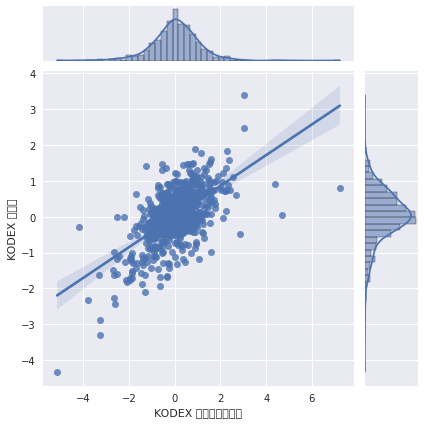

In [ ]:
import seaborn as sns

with plt.style.context('seaborn'):
    sns.jointplot('KODEX 턴어라운드투자','KODEX 코스피', data=ret, kind='reg')

In [ ]:
ret= ret.rename(columns={'KODEX 턴어라운드투자':'ta','KODEX 코스피':'kospi'})
from statsmodels.formula.api import ols
daily_ols = ols('ta~kospi', data=ret).fit()
daily_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ta   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     408.7
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           8.73e-72
Time:                        12:00:47   Log-Likelihood:                -859.42
No. Observations:                 695   AIC:                             1723.
Df Residuals:                     693   BIC:                             1732.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0225      0.032      0.711      0.478      -0.040       0.085
kospi          0.8668      0.043     20.215      0.000       0.783       0.951
==============================================================================
Omnibus:                      188.289   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1652.388
Skew:                           0.949   Prob(JB):                         0.00
Kurtosis:                      10.312   Cond. No.                         1.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
retMonthly = ret.asfreq("M", method='bfill')

monthly_ols = ols('ta~kospi', data = retMonthly).fit()
monthly_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ta   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     29.94
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           5.03e-06
Time:                        12:00:47   Log-Likelihood:                -47.120
No. Observations:                  34   AIC:                             98.24
Df Residuals:                      32   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0093      0.171      0.054      0.957      -0.339       0.358
kospi          1.0582      0.193      5.472      0.000       0.664       1.452
==============================================================================
Omnibus:                       15.451   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.930
Skew:                           1.136   Prob(JB):                     1.73e-05
Kurtosis:                       6.212   Cond. No.                         1.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0.98, "ta's Monthly Alpha & Beta")

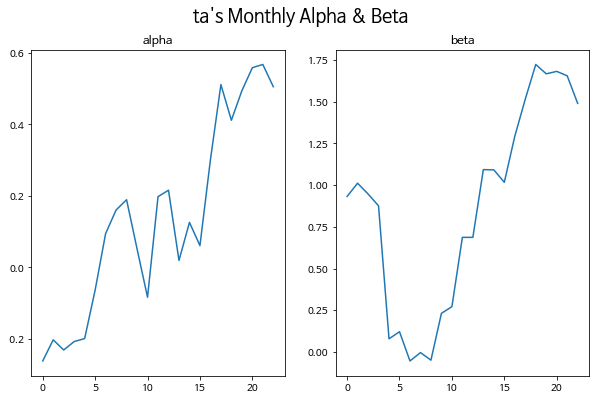

In [ ]:
coefs_a = []
coefs_b = []

j=12
while j <= len(retMonthly):
   df = retMonthly.iloc[j-12:j, :]
   coefs = ols('ta~kospi', data=df).fit().params
   coefs_a.append(coefs[0])
   coefs_b.append(coefs[1])
   j += 1
  
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].plot(coefs_a)
ax[0].set_title('alpha')
ax[1].plot(coefs_b)
ax[1].set_title('beta')
plt.suptitle("ta's Monthly Alpha & Beta", fontsize=18)

In [ ]:
abs(corr_mat['TIGER 200커버드콜5%OTM']).sort_values()

KODEX 골드선물(H)         0.001947
TIGER 금은선물(H)         0.012242
ARIRANG 단기우량채권        0.026999
KBSTAR 중기우량회사채        0.037084
KINDEX 중기국고채          0.048486
                        ...   
파워 200                0.869519
KINDEX 인버스            0.869839
KODEX 레버리지            0.870413
TIGER 레버리지            0.872548
TIGER 200커버드콜5%OTM    1.000000
Name: TIGER 200커버드콜5%OTM, Length: 241, dtype: float64

In [ ]:
corr_mat['TIGER 200커버드콜5%OTM'].sort_values()

KINDEX 인버스           -0.869839
TIGER 인버스            -0.869014
KODEX 인버스            -0.862863
KOSEF 200선물인버스       -0.851225
KBSTAR 200선물인버스2X    -0.849355
                        ...   
KOSEF 200             0.869280
파워 200                0.869519
KODEX 레버리지            0.870413
TIGER 레버리지            0.872548
TIGER 200커버드콜5%OTM    1.000000
Name: TIGER 200커버드콜5%OTM, Length: 241, dtype: float64

In [ ]:
data_ta = data[['TIGER 200커버드콜5%OTM','KODEX 턴어라운드투자']]
data_ta = data_ta.dropna()
data_ta

,TIGER 200커버드콜5%OTM,KODEX 턴어라운드투자
Name,,
2016-06-24,10210.0,9410.0
2016-06-27,10245.0,9440.0
2016-06-28,10265.0,9557.0
2016-06-29,10305.0,9680.0
2016-06-30,10435.0,9709.0
...,...,...
2019-04-22,12630.0,12790.0
2019-04-23,12650.0,12775.0
2019-04-24,12470.0,12625.0


In [ ]:
df_ex = data[['TIGER 200커버드콜5%OTM','KODEX 코스피']]
df_ex1 = df_ex.dropna(axis=0)
ret1 = (df_ex1.pct_change())*100
ret1 = ret1.dropna()
ret1.head()

,TIGER 200커버드콜5%OTM,KODEX 코스피
Name,,
2015-08-25,0.592992,1.118721
2015-08-26,1.982851,2.246557
2015-08-27,0.525486,0.977145
2015-08-28,1.359122,1.487070
2015-08-31,0.103146,-0.150838


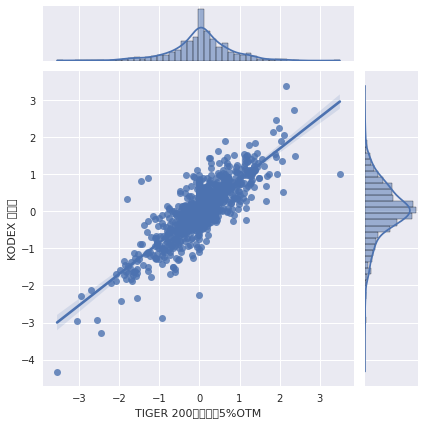

In [ ]:
import seaborn as sns

with plt.style.context('seaborn'):
    sns.jointplot('TIGER 200커버드콜5%OTM','KODEX 코스피', data=ret1, kind='reg')

In [ ]:
ret1= ret1.rename(columns={'TIGER 200커버드콜5%OTM':'cc','KODEX 코스피':'kospi'})
from statsmodels.formula.api import ols
daily_ols = ols('cc~kospi', data=ret1).fit()
daily_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cc   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1922.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          2.34e-225
Time:                        12:00:57   Log-Likelihood:                -499.87
No. Observations:                 900   AIC:                             1004.
Df Residuals:                     898   BIC:                             1013.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0115      0.014      0.819      0.413      -0.016       0.039
kospi          0.8068      0.018     43.840      0.000       0.771       0.843
==============================================================================
Omnibus:                       89.349   Durbin-Watson:                   2.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.698
Skew:                           0.089   Prob(JB):                    8.88e-129
Kurtosis:                       6.962   Cond. No.                         1.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
retMonthly1 = ret1.asfreq("M", method='bfill')

monthly_ols = ols('cc~kospi', data = retMonthly1).fit()
monthly_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cc   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     108.0
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           3.50e-13
Time:                        12:00:59   Log-Likelihood:                -31.671
No. Observations:                  44   AIC:                             67.34
Df Residuals:                      42   BIC:                             70.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0226      0.077     -0.294      0.770      -0.178       0.133
kospi          0.8818      0.085     10.394      0.000       0.711       1.053
==============================================================================
Omnibus:                       23.506   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.910
Skew:                          -1.337   Prob(JB):                     1.97e-12
Kurtosis:                       7.718   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0.98, "cc's Monthly Alpha & Beta")

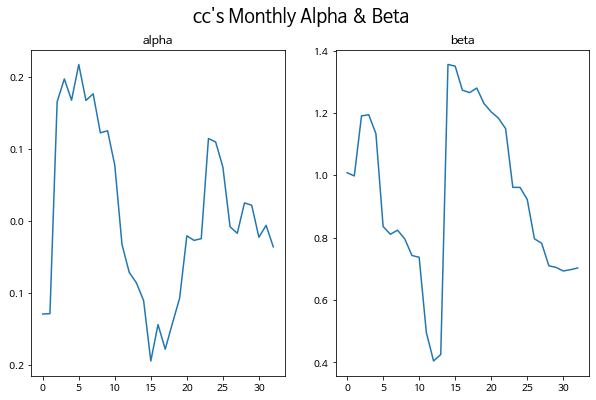

In [ ]:
coefs_a = []
coefs_b = []

j=12
while j <= len(retMonthly1):
   df = retMonthly1.iloc[j-12:j, :]
   coefs = ols('cc~kospi', data=df).fit().params
   coefs_a.append(coefs[0])
   coefs_b.append(coefs[1])
   j += 1
  
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].plot(coefs_a)
ax[0].set_title('alpha')
ax[1].plot(coefs_b)
ax[1].set_title('beta')
plt.suptitle("cc's Monthly Alpha & Beta", fontsize=18)

In [ ]:
data_ta = data[['KODEX 턴어라운드투자','TIGER 200커버드콜5%OTM']]
data_ta= data_ta.dropna()
data_ta

,KODEX 턴어라운드투자,TIGER 200커버드콜5%OTM
Name,,
2016-06-24,9410.0,10210.0
2016-06-27,9440.0,10245.0
2016-06-28,9557.0,10265.0
2016-06-29,9680.0,10305.0
2016-06-30,9709.0,10435.0
...,...,...
2019-04-22,12790.0,12630.0
2019-04-23,12775.0,12650.0
2019-04-24,12625.0,12470.0


In [ ]:
holding_periods=1
n_term=252 

returns_ta = data_ta.pct_change(holding_periods).iloc[holding_periods:] 
exp_rets_ta = returns_ta.mean() * n_term
cov_mat_ta = returns_ta.cov() * n_term
corr_mat_ta = returns_ta.corr()

<Figure size 7200x7200 with 0 Axes>

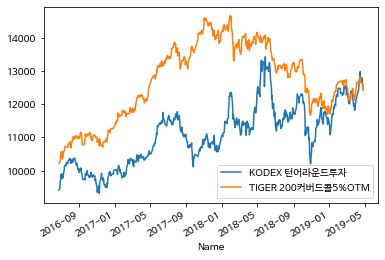

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(100, 100))
data_ta.plot()

<Figure size 7200x7200 with 0 Axes>

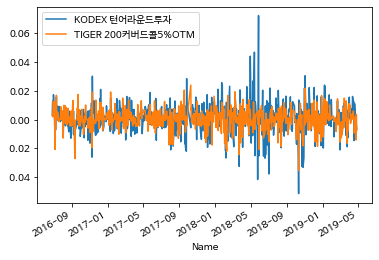

In [ ]:
plt.figure(figsize=(100, 100))
returns_ta.plot()

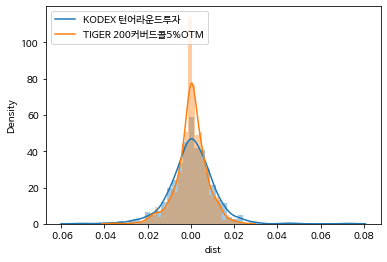

In [ ]:
import seaborn as sns
sns.distplot(returns_ta['KODEX 턴어라운드투자'])
sns.distplot(returns_ta['TIGER 200커버드콜5%OTM'])
plt.legend(labels = ['KODEX 턴어라운드투자','TIGER 200커버드콜5%OTM'],loc = 'upper left')
plt.xlabel('dist')
plt.show()

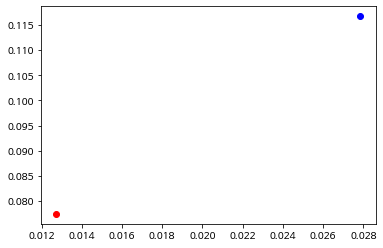

In [ ]:
mlb_var = returns_ta.var() * n_term
plt.scatter(mlb_var[0],exp_rets_ta[0],color = 'blue')
plt.scatter(mlb_var[1],exp_rets_ta[1],color = 'red')
plt.show()

In [ ]:
holding_periods=1
n_term = 252

returns_ta = data_ta.pct_change(holding_periods).iloc[holding_periods:] 

exp_rets_ta = returns_ta.mean() * n_term 
cov_mat_ta = returns_ta.cov() * n_term 
corr_mat_ta = returns_ta.corr() 

In [ ]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
    n = len(cov_mat)

    # Objective function
    # min (1/2)*w.T*P*w
    P = opt.matrix(cov_mat.values) 
    q = opt.matrix(0.0, (n, 1))


    # Constraints Gw <= h
    # exp_rets*w >= target_ret and w >= 0
    G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
    h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

    # Constraints Aw = b
    # sum(w) = 1
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Solve
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)

    # Put weights into a labeled series
    w = pd.Series(sol['x'], index=cov_mat.index)

    return w

In [ ]:
max_risk=0.5
max_ret = exp_rets_ta.max()
min_ret = exp_rets_ta[exp_rets_ta > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks_ta = []
rets_ta = []
weights_ta = []

for step in range(0, n_step+1):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_ta, exp_rets_ta, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat_ta), _w))


    if risk > max_risk:
        break

    risks_ta.append(risk)
    ret = np.dot(exp_rets_ta, _w)
    rets_ta.append(ret)
    weights_ta.append(_w)


In [ ]:
min_risk_ta_idx = np.argmin(risks_ta)
min_risk_ta = risks_ta[min_risk_ta_idx] 
min_risk_ret_ta = rets_ta[min_risk_ta_idx]
min_risk_weight_ta = weights_ta[min_risk_ta_idx]
print("Risk of minimum variance portfolio : ", min_risk_ta)
print("Return of minimum variance portfolio : ", min_risk_ret_ta)
print("Weight of minimum variance portfolio :  ")
print(min_risk_weight_ta)

Risk of minimum variance portfolio :  0.11018312091648791
Return of minimum variance portfolio :  0.08374385083035446
Weight of minimum variance portfolio :  
KODEX 턴어라운드투자         0.160904
TIGER 200커버드콜5%OTM    0.839096
dtype: float64


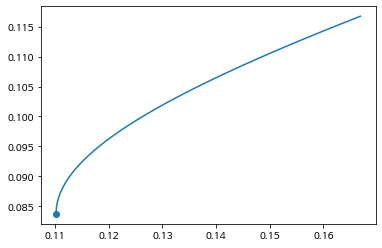

In [ ]:
plt.plot(risks_ta, rets_ta)
plt.scatter(min_risk_ta, min_risk_ret_ta)
plt.show()

In [ ]:
holding_periods=1
n_term=252 

returns_ta = data_ta.pct_change(holding_periods).iloc[holding_periods:] 
exp_rets_ta = returns_ta.mean() * n_term
cov_mat_ta= returns_ta.cov() * n_term
corr_mat_ta = returns_ta.corr()

In [ ]:
rf_rate = 0.005

slopes_ta = []

# ToDo
for i in range(len(rets_ta)):
    slope_ = (rets_ta[i] - rf_rate) / risks_ta[i]
    slopes_ta.append(slope_)

max_tangency_ta_idx = np.argmax(slopes_ta)
max_tangency_ta = slopes_ta[max_tangency_ta_idx]

In [ ]:
max_tangency_risk_ta = risks_ta[max_tangency_ta_idx]
max_tangency_return_ta = rets_ta[max_tangency_ta_idx]
max_tangency_weight_ta = weights_ta[max_tangency_ta_idx]

print("Risk of tangency portfolio : ", max_tangency_risk_ta)
print("Return of tangency portfolio : ", max_tangency_return_ta)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_ta - rf_rate) / max_tangency_risk_ta)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_ta)

Risk of tangency portfolio :  0.11728925181575946
Return of tangency portfolio :  0.09432089046810876
Sharpe ratio of tangency portfolio :  0.7615436971873261
Weight of minimum variance portfolio : 
KODEX 턴어라운드투자         0.43
TIGER 200커버드콜5%OTM    0.57
dtype: float64


In [ ]:
ys_ta = []
for i in range(len(risks_ta)):
    ys_ta.append(max_tangency_ta * risks_ta[i] + rf_rate)

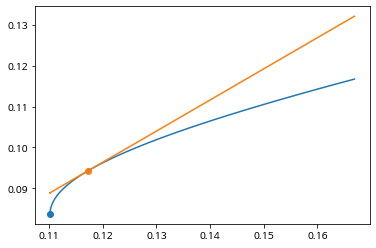

In [ ]:
plt.plot(risks_ta, rets_ta)
plt.plot(risks_ta, ys_ta)
plt.scatter(min_risk_ta, min_risk_ret_ta)
plt.scatter(max_tangency_risk_ta, max_tangency_return_ta)
plt.show()

In [ ]:
fin_w_f = list(np.arange(0,1.01,0.05))
fin_w_r = list(reversed(fin_w_f))


fin_ret_ta = []
fin_risk_ta =[]

for i in range(len(fin_w_f)):
  ret = 0.005*fin_w_f[i] + fin_w_r[i] * float(max_tangency_return_ta)
  risk = fin_w_r[i]*max_tangency_risk_ta
  fin_ret_ta.append(round(ret,3))
  fin_risk_ta.append(round(risk,3))

fin_ta_port = pd.DataFrame([fin_w_f,fin_w_r,fin_ret_ta,fin_risk_ta]).T
fin_ta_port.columns = ['free_weight','risk_weight','klbport_ret','klbport_risk']


In [ ]:
fin_ta_port

,free_weight,risk_weight,klbport_ret,klbport_risk
0,0.00,1.00,0.094,0.117
1,0.05,0.95,0.090,0.111
2,0.10,0.90,0.085,0.106
3,0.15,0.85,0.081,0.100
4,0.20,0.80,0.076,0.094
5,0.25,0.75,0.072,0.088
6,0.30,0.70,0.068,0.082
7,0.35,0.65,0.063,0.076
8,0.40,0.60,0.059,0.070
9,0.45,0.55,0.054,0.065


In [ ]:
data_ta = data_ta['2017-04-26':]

In [ ]:
def create_data(data):
    
    result = data.pct_change(20).iloc[20:]
    
    returns = result
    avg_rets = returns.mean()*12
    cov_mat = returns.cov()*12

    return returns, cov_mat, avg_rets

In [ ]:
def tangency_portfolio(cov_mat, exp_rets, target_ret, min_rets, max_rets, rf_rate = 0.01):
    
    n = len(cov_mat)
    P = opt.matrix(cov_mat.values)
    q = opt.matrix(0.0, (n, 1))
    
    tangency_queue = []
    weights_queue = []
    return_queue = []
    cov_queue = []
    
    step = (max_rets - min_rets)/100
    for i in range(100):
                
        try:
        
            target_ret = min_rets + (i * step)

            # Constraints Gx <= h

            G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
            h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

            # Constraints Ax = b
            # sum(x) = 1
            A = opt.matrix(1.0, (1, n))
            b = opt.matrix(1.0)

            solvers.options['show_progress'] = False
            sol = solvers.qp(P, q, G, h, A, b)

            if sol['status'] != 'optimal':
                pass

            # Put weights into a labeled series
            weights = pd.Series(sol['x'], index=cov_mat.index)
            
            tangency_ = (np.dot(exp_rets, weights) - rf_rate) / np.sqrt(np.dot(np.dot(weights, cov_mat), weights))
            tangency_queue.append(tangency_)
            weights_queue.append(weights)
            return_queue.append(np.dot(exp_rets, weights))
            cov_queue.append(np.sqrt(np.dot(np.dot(weights, cov_mat), weights)))
        
        except:
            pass

    
    tan_index = tangency_queue.index(max(tangency_queue))
    
    weights = weights_queue[tan_index]

    return weights 

In [ ]:
ret = data_ta.pct_change().iloc[1:]

In [ ]:
data_ta.shape

(487, 2)

In [ ]:
def back_test(data, ret):

    # Window_size는 tangency portfolio를 구할 때 이전 몇 달의 데이터를 사용할 것인지 나타낸다.
    total_days = data.shape[0]
    
    # Rebalancing을 한 달마다 진행하는 경우, 'M'으로 rebalance_period는 20이 된다.
    rebalance_period = 60 # 3개월에 한번 = 분기당 한번
    window_size = 120 # 지난 6개월

    returns, cov_mat, avg_rets= create_data(data)
    
    # n_rebalance : 총 몇 번의 리밸런싱을 하게 되는지?
    n_rebalance = (total_days - window_size) // rebalance_period
    w = []
    rebalancing_date=[]
    original_weights = []
    
    rebal = 60
    for i in range(window_size, total_days):
        # 리밸런싱을 할 때 마다 Tangency portfolio weight를 새로 구해야 한다.
        # 이때 리밸런싱 시점 이전의 총 120일 간의 데이터를 사용한다.
        
        if rebal % rebalance_period == 0:
            #print('rebalance')
            _returns, _cov_mat, _avg_rets= create_data(data[(i-window_size):i])
            rebalancing_date.append(data.index[i:i+1]) # rebalance_period 씩 늘려가자
            rebal = 0
            _target_ret = _avg_rets.quantile(0.7)
            _min_ret = _avg_rets.min()
            _max_ret = _avg_rets.max()
            _w = tangency_portfolio(_cov_mat, _avg_rets, _target_ret, _min_ret, _max_ret)
            print(n_rebalance)
            n_rebalance = n_rebalance - 1
            print(_w)
            _w.plot.bar()
            plt.show()
            plt.close()
            _w = np.asarray(_w.values) #np.array([0.0, 0.0, 1.0, 0.0, 0.0])
            w.append(_w)
            

        rebal = rebal + 1
        
    
    price = data
    price = np.array(price)
    
    port = [] # 여기에 날마다 변하는 Portfolio value를 저장한다.
    port_date = [] # 여기에 portfolio의 data를 저장한다.
    portfolio_value = 10000
    port_each_money = [] # 그 날의 portfolio의 구성이다. Ex) 만약 Asset1에 6000원, Asset2에 4000원, 나머지에 0원이 있다면 [6000, 4000, 0, 0, 0]이 된다.
    
    rebal = 60
    j = 0
    for i in range(window_size, total_days):
        
        if i == window_size: # 초기화
            port_each_money = portfolio_value * w[j]
            rebal = 1
            # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
            portfolio_value = port_each_money.sum()
            # port에 portfolio_value를 저장하여 준다.
            port.append(portfolio_value)
            j = j+1


        else:
            #각 날마다 자산의 가격이 바뀌므로, port_each_money 변화한다.
            port_each_money = port_each_money * (1+ret.iloc[i])
            portfolio_value = port_each_money.sum()
            if rebal % rebalance_period == 0:
                rebal = 0
                # 리밸런싱을 하는 날이다. Portfolio value를 새로운 tangency portfolio weight로 맞춰준다.
                port_each_money = portfolio_value * w[j]
                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                j = j+1
            
            else:
                # 리밸런싱 날짜가 아닌 평범함 날짜. 
                # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
            
        rebal = rebal + 1
        port_date.append(data.index[i:i+1][0])
    
    portfolio = pd.DataFrame(port, columns = ['portfolio_value'], index = port_date)
    
    return w, portfolio, rebalancing_date

In [ ]:
data_ta

,KODEX 턴어라운드투자,TIGER 200커버드콜5%OTM
Name,,
2017-04-26,10572.0,12510.0
2017-04-27,10597.0,12520.0
2017-04-28,10493.0,12570.0
2017-05-02,10522.0,12630.0
2017-05-04,10512.0,12715.0
...,...,...
2019-04-22,12790.0,12630.0
2019-04-23,12775.0,12650.0
2019-04-24,12625.0,12470.0


In [ ]:
ret

,KODEX 턴어라운드투자,TIGER 200커버드콜5%OTM
Name,,
2017-04-27,0.002365,0.000799
2017-04-28,-0.009814,0.003994
2017-05-02,0.002764,0.004773
2017-05-04,-0.000950,0.006730
2017-05-08,0.009037,0.006292
...,...,...
2019-04-22,-0.000781,-0.001976
2019-04-23,-0.001173,0.001584
2019-04-24,-0.011742,-0.014229


6
KODEX 턴어라운드투자         0.01
TIGER 200커버드콜5%OTM    0.99
dtype: float64


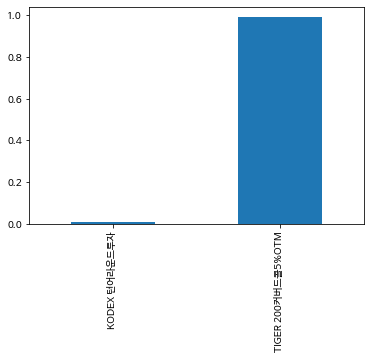

5
KODEX 턴어라운드투자         0.01
TIGER 200커버드콜5%OTM    0.99
dtype: float64


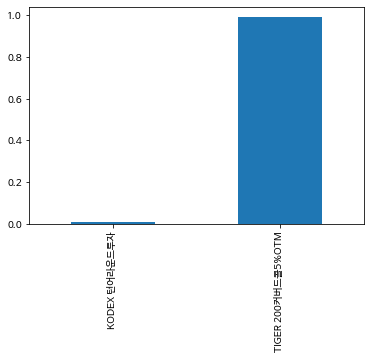

4
KODEX 턴어라운드투자         0.99
TIGER 200커버드콜5%OTM    0.01
dtype: float64


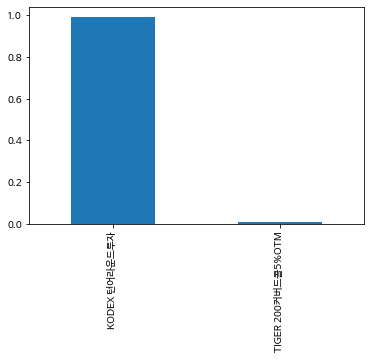

3
KODEX 턴어라운드투자         0.99
TIGER 200커버드콜5%OTM    0.01
dtype: float64


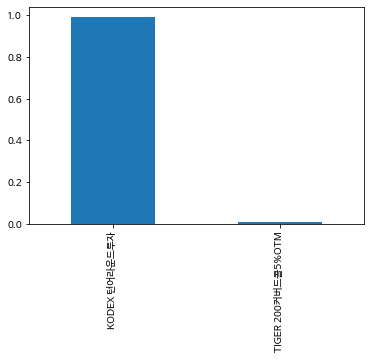

2
KODEX 턴어라운드투자         0.99
TIGER 200커버드콜5%OTM    0.01
dtype: float64


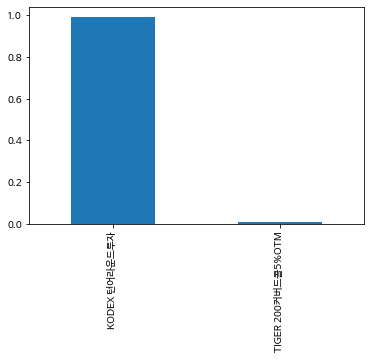

1
KODEX 턴어라운드투자         0.99
TIGER 200커버드콜5%OTM    0.01
dtype: float64


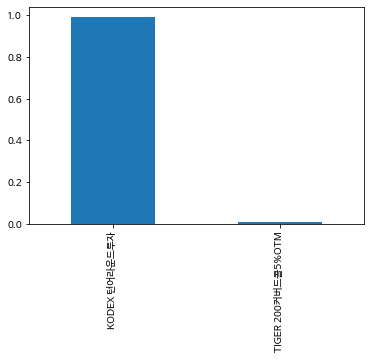

0
KODEX 턴어라운드투자         0.99
TIGER 200커버드콜5%OTM    0.01
dtype: float64


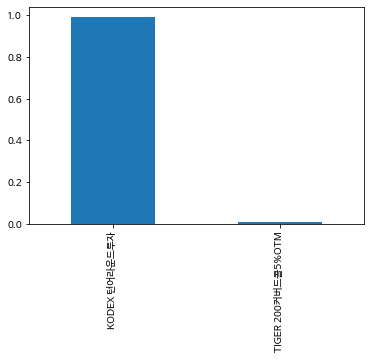

In [ ]:
w_ta, portfolio_ta, rebalancing_date_ta = back_test(data_ta[1:], ret)

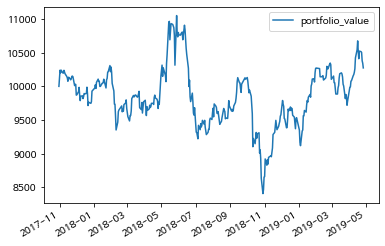

In [ ]:
portfolio_ta.plot()

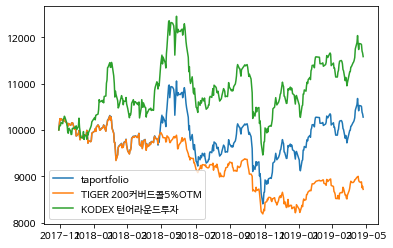

In [ ]:
# Backtest Result Plotting
plt.plot(portfolio_ta, label="taportfolio")

for symbol in ['TIGER 200커버드콜5%OTM', 'KODEX 턴어라운드투자']:
    plt.plot(data_ta[121:][symbol] * 10000 / data_ta[121:][symbol][0], label='{}'.format(symbol))

plt.legend()
plt.show()

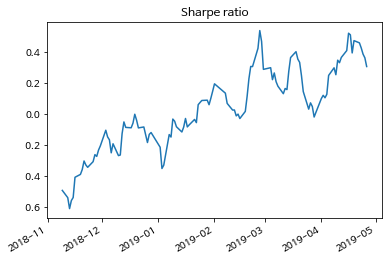

In [ ]:
# Sharpe Ratio 계산

new_port_ta = portfolio_ta
new_port_ta['returns'] = new_port_ta['portfolio_value'].pct_change(1)

# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    rf_rate = 0.01
    return (y.mean()*252 - rf_rate) / (y.std()*np.sqrt(252))

# Calculate rolling Sharpe ratio
new_port_ta['rs'] = new_port_ta['returns'].rolling(252).apply(my_rolling_sharpe)

new_port_ta['rs'][252:].plot()
plt.title('Sharpe ratio')
plt.show()

In [ ]:
portfolio_ta.values[-1][0]

10274.786844189062

# BIO


In [ ]:
abs(corr_mat['KODEX 바이오']).sort_values()

TIGER 금은선물(H)         0.004855
KINDEX 러시아MSCI(합성)    0.009073
KODEX 골드선물(H)         0.012731
KODEX 미국S&P에너지(합성)    0.014098
KODEX 미국S&P산업재(합성)    0.018812
                        ...   
KODEX 헬스케어            0.865954
TIGER 코스닥150바이오테크     0.867917
TIGER 헬스케어            0.871058
KBSTAR 헬스케어           0.883004
KODEX 바이오             1.000000
Name: KODEX 바이오, Length: 241, dtype: float64

In [ ]:
corr_mat['KODEX 바이오'].sort_values()

KODEX 코스닥150선물인버스    -0.841716
TIGER 코스닥150선물인버스    -0.839206
KBSTAR 200선물인버스2X    -0.453340
KODEX 200선물인버스2X     -0.453083
ARIRANG 200선물인버스2X   -0.447245
                        ...   
KODEX 헬스케어            0.865954
TIGER 코스닥150바이오테크     0.867917
TIGER 헬스케어            0.871058
KBSTAR 헬스케어           0.883004
KODEX 바이오             1.000000
Name: KODEX 바이오, Length: 241, dtype: float64

In [ ]:
corr_mat['KODEX 바이오']['KODEX 가치투자']

0.36959932487111435

In [ ]:
corr_mat['KODEX 바이오']['TIGER 미국나스닥바이오']

0.16666753618915928

In [ ]:
data_bio = data[['KODEX 바이오','KODEX 코스피']]
data_bio= data_bio.dropna()
data_bio

,KODEX 바이오,KODEX 코스피
Name,,
2016-05-13,10345.0,19107.0
2016-05-16,10395.0,19112.0
2016-05-17,10385.0,19107.0
2016-05-18,10370.0,18986.0
2016-05-19,10315.0,18898.0
...,...,...
2019-04-22,11070.0,22680.0
2019-04-23,10970.0,22675.0
2019-04-24,10890.0,22475.0


In [ ]:
df_ex = data[['KODEX 바이오','KODEX 코스피']]
df_ex = df_ex.dropna(axis=0)
ret = (df_ex.pct_change())*100
ret = ret.dropna()
ret.head()

,KODEX 바이오,KODEX 코스피
Name,,
2016-05-16,0.483325,0.026168
2016-05-17,-0.096200,-0.026162
2016-05-18,-0.144439,-0.633276
2016-05-19,-0.530376,-0.463499
2016-05-20,2.762967,0.079373


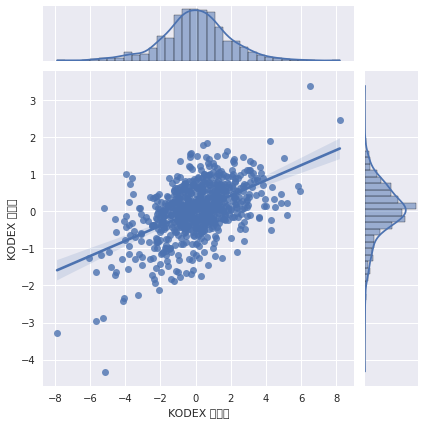

In [ ]:
import seaborn as sns

with plt.style.context('seaborn'):
    sns.jointplot('KODEX 바이오','KODEX 코스피', data=ret, kind='reg')

In [ ]:
ret= ret.rename(columns={'KODEX 바이오':'bio','KODEX 코스피':'kospi'})
from statsmodels.formula.api import ols
daily_ols = ols('bio~kospi', data=ret).fit()
daily_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bio   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     270.2
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           8.07e-52
Time:                        12:03:22   Log-Likelihood:                -1378.0
No. Observations:                 724   AIC:                             2760.
Df Residuals:                     722   BIC:                             2769.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0080      0.060     -0.133      0.895      -0.127       0.111
kospi          1.3353      0.081     16.439      0.000       1.176       1.495
==============================================================================
Omnibus:                       11.407   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.141
Skew:                           0.141   Prob(JB):                     0.000313
Kurtosis:                       3.675   Cond. No.                         1.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
retMonthly = ret.asfreq("M", method='bfill')

monthly_ols = ols('bio~kospi', data = retMonthly).fit()
monthly_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bio   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     6.316
Date:                Thu, 21 Apr 2022   Prob (F-statistic):             0.0170
Time:                        12:03:22   Log-Likelihood:                -75.548
No. Observations:                  35   AIC:                             155.1
Df Residuals:                      33   BIC:                             158.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3493      0.365     -0.958      0.345      -1.091       0.393
kospi          1.0395      0.414      2.513      0.017       0.198       1.881
==============================================================================
Omnibus:                        1.804   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                0.995
Skew:                           0.395   Prob(JB):                        0.608
Kurtosis:                       3.239   Cond. No.                         1.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0.98, "bio's Monthly Alpha & Beta")

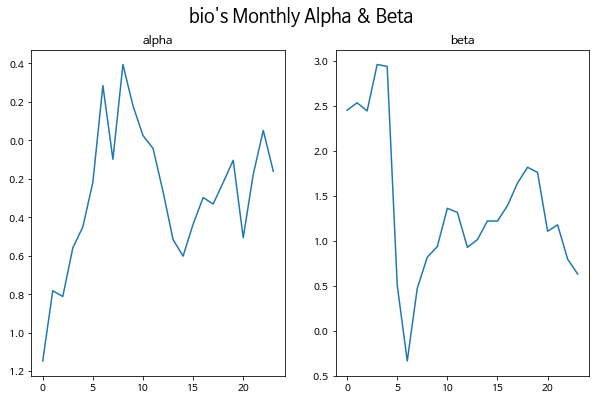

In [ ]:
coefs_a = []
coefs_b = []

j=12
while j <= len(retMonthly):
   df = retMonthly.iloc[j-12:j, :]
   coefs = ols('bio~kospi', data=df).fit().params
   coefs_a.append(coefs[0])
   coefs_b.append(coefs[1])
   j += 1
  
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].plot(coefs_a)
ax[0].set_title('alpha')
ax[1].plot(coefs_b)
ax[1].set_title('beta')
plt.suptitle("bio's Monthly Alpha & Beta", fontsize=18)

In [ ]:
abs(corr_mat['KODEX 가치투자']).sort_values()

KINDEX 골드선물 인버스2X(합성 H)    0.007582
KODEX 골드선물(H)              0.011634
KINDEX 골드선물 레버리지(합성 H)     0.020910
ARIRANG 단기유동성              0.023642
TIGER 금은선물(H)              0.032470
                             ...   
KODEX 턴어라운드투자              0.773821
KBSTAR 수출주                 0.782430
KODEX 200동일가중              0.788267
KOSEF 저PBR가중               0.814700
KODEX 가치투자                 1.000000
Name: KODEX 가치투자, Length: 241, dtype: float64

In [ ]:
corr_mat['KODEX 가치투자'].sort_values()

KBSTAR 200선물인버스2X    -0.633955
KINDEX 인버스           -0.632011
KOSEF 200선물인버스2X     -0.631697
KODEX 200선물인버스2X     -0.631530
ARIRANG 200선물인버스2X   -0.630836
                        ...   
KODEX 턴어라운드투자         0.773821
KBSTAR 수출주            0.782430
KODEX 200동일가중         0.788267
KOSEF 저PBR가중          0.814700
KODEX 가치투자            1.000000
Name: KODEX 가치투자, Length: 241, dtype: float64

In [ ]:
data_bio = data[['KODEX 바이오','KODEX 가치투자']]
data_bio = data_bio.dropna()
data_bio

,KODEX 바이오,KODEX 가치투자
Name,,
2016-06-24,10285.0,9345.0
2016-06-27,10385.0,9384.0
2016-06-28,10665.0,9423.0
2016-06-29,10840.0,9588.0
2016-06-30,10990.0,9579.0
...,...,...
2019-04-22,11070.0,11160.0
2019-04-23,10970.0,11160.0
2019-04-24,10890.0,11050.0


In [ ]:
df_ex = data[['KODEX 가치투자','KODEX 코스피']]
df_ex1 = df_ex.dropna(axis=0)
ret1 = (df_ex1.pct_change())*100
ret1 = ret1.dropna()
ret1.head()

,KODEX 가치투자,KODEX 코스피
Name,,
2016-06-27,0.417335,-0.181634
2016-06-28,0.415601,0.674338
2016-06-29,1.751035,0.722981
2016-06-30,-0.093867,0.744181
2016-07-01,1.064829,0.969195


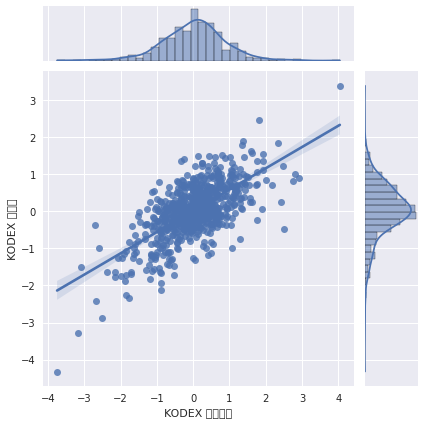

In [ ]:
import seaborn as sns

with plt.style.context('seaborn'):
    sns.jointplot('KODEX 가치투자','KODEX 코스피', data=ret1, kind='reg')

In [ ]:
ret1= ret1.rename(columns={'KODEX 가치투자':'val','KODEX 코스피':'kospi'})
from statsmodels.formula.api import ols
daily_ols = ols('val~kospi', data=ret1).fit()
daily_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    val   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     577.9
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           2.43e-93
Time:                        12:03:33   Log-Likelihood:                -677.88
No. Observations:                 695   AIC:                             1360.
Df Residuals:                     693   BIC:                             1369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0045      0.024      0.185      0.853      -0.043       0.052
kospi          0.7938      0.033     24.040      0.000       0.729       0.859
==============================================================================
Omnibus:                       28.322   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.058
Skew:                           0.317   Prob(JB):                     9.97e-11
Kurtosis:                       4.091   Cond. No.                         1.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
retMonthly1 = ret1.asfreq("M", method='bfill')

monthly_ols = ols('val~kospi', data = retMonthly1).fit()
monthly_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    val   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     47.35
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           8.69e-08
Time:                        12:03:34   Log-Likelihood:                -33.100
No. Observations:                  34   AIC:                             70.20
Df Residuals:                      32   BIC:                             73.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0169      0.113     -0.149      0.882      -0.248       0.214
kospi          0.8811      0.128      6.881      0.000       0.620       1.142
==============================================================================
Omnibus:                       11.603   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.349
Skew:                           1.104   Prob(JB):                      0.00343
Kurtosis:                       4.772   Cond. No.                         1.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0.98, "val's Monthly Alpha & Beta")

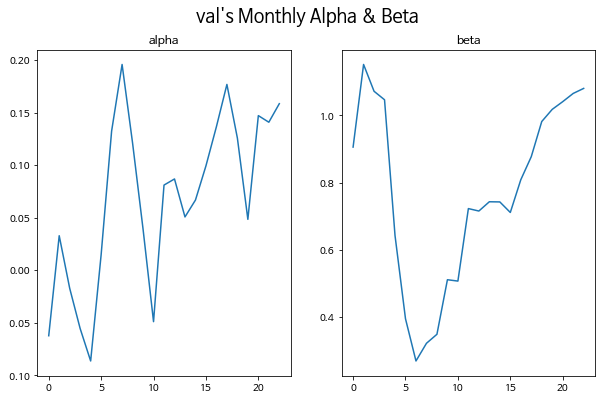

In [ ]:
coefs_a = []
coefs_b = []

j=12
while j <= len(retMonthly1):
   df = retMonthly1.iloc[j-12:j, :]
   coefs = ols('val~kospi', data=df).fit().params
   coefs_a.append(coefs[0])
   coefs_b.append(coefs[1])
   j += 1
  
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].plot(coefs_a)
ax[0].set_title('alpha')
ax[1].plot(coefs_b)
ax[1].set_title('beta')
plt.suptitle("val's Monthly Alpha & Beta", fontsize=18)

In [ ]:
data_bio = data[['KODEX 바이오','KODEX 가치투자']]
data_bio= data_bio.dropna()
data_bio

,KODEX 바이오,KODEX 가치투자
Name,,
2016-06-24,10285.0,9345.0
2016-06-27,10385.0,9384.0
2016-06-28,10665.0,9423.0
2016-06-29,10840.0,9588.0
2016-06-30,10990.0,9579.0
...,...,...
2019-04-22,11070.0,11160.0
2019-04-23,10970.0,11160.0
2019-04-24,10890.0,11050.0


In [ ]:
holding_periods=1
n_term=252 

returns_bio = data_bio.pct_change(holding_periods).iloc[holding_periods:] 
exp_rets_bio = returns_bio.mean() * n_term
cov_mat_bio = returns_bio.cov() * n_term
corr_mat_bio = returns_bio.corr()

<Figure size 7200x7200 with 0 Axes>

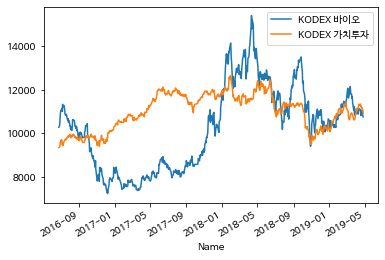

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(100, 100))
data_bio.plot()

<Figure size 7200x7200 with 0 Axes>

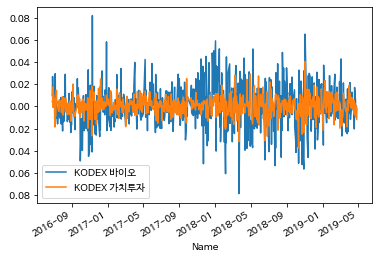

In [ ]:
plt.figure(figsize=(100, 100))
returns_bio.plot()

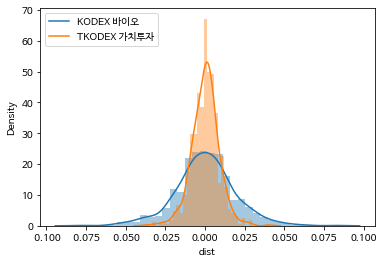

In [ ]:
import seaborn as sns
sns.distplot(returns_bio['KODEX 바이오'])
sns.distplot(returns_bio['KODEX 가치투자'])
plt.legend(labels = ['KODEX 바이오','TKODEX 가치투자'],loc = 'upper left')

plt.xlabel('dist')
plt.show()

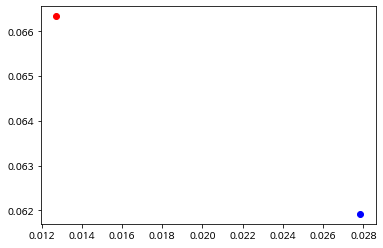

In [ ]:
mlb_var = returns_ta.var() * n_term
plt.scatter(mlb_var[0],exp_rets_bio[0],color = 'blue')
plt.scatter(mlb_var[1],exp_rets_bio[1],color = 'red')
plt.show()

In [ ]:
holding_periods=1
n_term = 252

returns_bio = data_bio.pct_change(holding_periods).iloc[holding_periods:] 

exp_rets_bio = returns_bio.mean() * n_term 
cov_mat_bio = returns_bio.cov() * n_term 
corr_mat_bio = returns_bio.corr() 

In [ ]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
    n = len(cov_mat)

    # Objective function
    # min (1/2)*w.T*P*w
    P = opt.matrix(cov_mat.values) 
    q = opt.matrix(0.0, (n, 1))


    # Constraints Gw <= h
    # exp_rets*w >= target_ret and w >= 0
    G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
    h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

    # Constraints Aw = b
    # sum(w) = 1
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Solve
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)

    # Put weights into a labeled series
    w = pd.Series(sol['x'], index=cov_mat.index)

    return w

In [ ]:
max_risk=0.5
max_ret = exp_rets_bio.max()
min_ret = exp_rets_bio[exp_rets_bio > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks_bio = []
rets_bio = []
weights_bio = []

for step in range(0, n_step+1):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_bio, exp_rets_bio, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat_bio), _w))


    if risk > max_risk:
        break

    risks_bio.append(risk)
    ret = np.dot(exp_rets_bio, _w)
    rets_bio.append(ret)
    weights_bio.append(_w)


In [ ]:
min_risk_bio_idx = np.argmin(risks_bio)
min_risk_bio = risks_bio[min_risk_bio_idx] 
min_risk_ret_bio = rets_bio[min_risk_bio_idx]
min_risk_weight_bio = weights_bio[min_risk_bio_idx]
print("Risk of minimum variance portfolio : ", min_risk_bio)
print("Return of minimum variance portfolio : ", min_risk_ret_bio)
print("Weight of minimum variance portfolio :  ")
print(min_risk_weight_bio)

Risk of minimum variance portfolio :  0.13743868809718027
Return of minimum variance portfolio :  0.06612990473681014
Weight of minimum variance portfolio :  
KODEX 바이오     0.046481
KODEX 가치투자    0.953519
dtype: float64


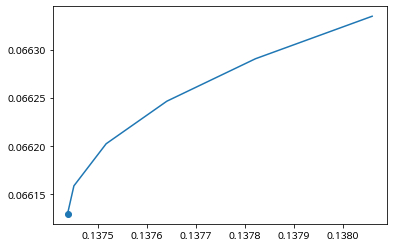

In [ ]:
plt.plot(risks_bio, rets_bio)
plt.scatter(min_risk_bio, min_risk_ret_bio)
plt.show()

In [ ]:
holding_periods=1
n_term=252 

returns_bio = data_bio.pct_change(holding_periods).iloc[holding_periods:] 
exp_rets_bio = returns_bio.mean() * n_term
cov_mat_bio= returns_bio.cov() * n_term
corr_mat_bio = returns_bio.corr()

In [ ]:
rf_rate = 0.005

slopes_bio = []

# ToDo
for i in range(len(rets_bio)):
    slope_ = (rets_bio[i] - rf_rate) / risks_bio[i]
    slopes_bio.append(slope_)

max_tangency_bio_idx = np.argmax(slopes_bio)
max_tangency_bio = slopes_bio[max_tangency_bio_idx]

In [ ]:
max_tangency_risk_bio = risks_bio[max_tangency_bio_idx]
max_tangency_return_bio = rets_bio[max_tangency_bio_idx]
max_tangency_weight_bio = weights_bio[max_tangency_bio_idx]

print("Risk of tangency portfolio : ", max_tangency_risk_bio)
print("Return of tangency portfolio : ", max_tangency_return_bio)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_bio - rf_rate) / max_tangency_risk_bio)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_bio)

Risk of tangency portfolio :  0.13751691057746607
Return of tangency portfolio :  0.06620261606415295
Sharpe ratio of tangency portfolio :  0.44505519944528044
Weight of minimum variance portfolio : 
KODEX 바이오     0.029998
KODEX 가치투자    0.970002
dtype: float64


In [ ]:
ys_bio = []
for i in range(len(risks_bio)):
    ys_bio.append(max_tangency_bio * risks_bio[i] + rf_rate)

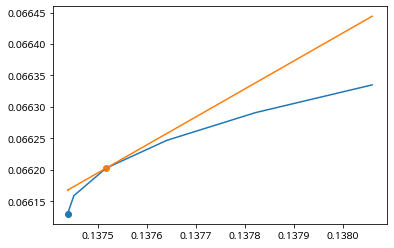

In [ ]:
plt.plot(risks_bio, rets_bio)
plt.plot(risks_bio, ys_bio)
plt.scatter(min_risk_bio, min_risk_ret_bio)
plt.scatter(max_tangency_risk_bio, max_tangency_return_bio)
plt.show()

In [ ]:
fin_w_f = list(np.arange(0,1.01,0.05))
fin_w_r = list(reversed(fin_w_f))


fin_ret_bio = []
fin_risk_bio =[]

for i in range(len(fin_w_f)):
  ret = 0.005*fin_w_f[i] + fin_w_r[i] * float(max_tangency_return_bio)
  risk = fin_w_r[i]*max_tangency_risk_bio
  fin_ret_bio.append(round(ret,3))
  fin_risk_bio.append(round(risk,3))

fin_bio_port = pd.DataFrame([fin_w_f,fin_w_r,fin_ret_bio,fin_risk_bio]).T
fin_bio_port.columns = ['free_weight','risk_weight','klbport_ret','klbport_risk']


In [ ]:
fin_bio_port

,free_weight,risk_weight,klbport_ret,klbport_risk
0,0.00,1.00,0.066,0.138
1,0.05,0.95,0.063,0.131
2,0.10,0.90,0.060,0.124
3,0.15,0.85,0.057,0.117
4,0.20,0.80,0.054,0.110
5,0.25,0.75,0.051,0.103
6,0.30,0.70,0.048,0.096
7,0.35,0.65,0.045,0.089
8,0.40,0.60,0.042,0.083
9,0.45,0.55,0.039,0.076


In [ ]:
data_bio = data_bio['2017-04-26':]

In [ ]:
def create_data(data):
    
    result = data.pct_change(20).iloc[20:]
    
    returns = result
    avg_rets = returns.mean()*12
    cov_mat = returns.cov()*12

    return returns, cov_mat, avg_rets

In [ ]:
def tangency_portfolio(cov_mat, exp_rets, target_ret, min_rets, max_rets, rf_rate = 0.01):
    
    n = len(cov_mat)
    P = opt.matrix(cov_mat.values)
    q = opt.matrix(0.0, (n, 1))
    
    tangency_queue = []
    weights_queue = []
    return_queue = []
    cov_queue = []
    
    step = (max_rets - min_rets)/100
    for i in range(100):
                
        try:
        
            target_ret = min_rets + (i * step)

            # Constraints Gx <= h

            G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
            h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

            # Constraints Ax = b
            # sum(x) = 1
            A = opt.matrix(1.0, (1, n))
            b = opt.matrix(1.0)

            solvers.options['show_progress'] = False
            sol = solvers.qp(P, q, G, h, A, b)

            if sol['status'] != 'optimal':
                pass

            # Put weights into a labeled series
            weights = pd.Series(sol['x'], index=cov_mat.index)
            
            tangency_ = (np.dot(exp_rets, weights) - rf_rate) / np.sqrt(np.dot(np.dot(weights, cov_mat), weights))
            tangency_queue.append(tangency_)
            weights_queue.append(weights)
            return_queue.append(np.dot(exp_rets, weights))
            cov_queue.append(np.sqrt(np.dot(np.dot(weights, cov_mat), weights)))
        
        except:
            pass

    
    tan_index = tangency_queue.index(max(tangency_queue))
    
    weights = weights_queue[tan_index]

    return weights 

In [ ]:
ret = data_bio.pct_change().iloc[1:]

In [ ]:
data_bio.shape

(487, 2)

In [ ]:
def back_test(data, ret):

    # Window_size는 tangency portfolio를 구할 때 이전 몇 달의 데이터를 사용할 것인지 나타낸다.
    total_days = data.shape[0]
    
    # Rebalancing을 한 달마다 진행하는 경우, 'M'으로 rebalance_period는 20이 된다.
    rebalance_period = 60 # 3개월에 한번 = 분기당 한번
    window_size = 120 # 지난 6개월

    returns, cov_mat, avg_rets= create_data(data)
    
    # n_rebalance : 총 몇 번의 리밸런싱을 하게 되는지?
    n_rebalance = (total_days - window_size) // rebalance_period
    w = []
    rebalancing_date=[]
    original_weights = []
    
    rebal = 60
    for i in range(window_size, total_days):
        # 리밸런싱을 할 때 마다 Tangency portfolio weight를 새로 구해야 한다.
        # 이때 리밸런싱 시점 이전의 총 120일 간의 데이터를 사용한다.
        
        if rebal % rebalance_period == 0:
            #print('rebalance')
            _returns, _cov_mat, _avg_rets= create_data(data[(i-window_size):i])
            rebalancing_date.append(data.index[i:i+1]) # rebalance_period 씩 늘려가자
            rebal = 0
            _target_ret = _avg_rets.quantile(0.7)
            _min_ret = _avg_rets.min()
            _max_ret = _avg_rets.max()
            _w = tangency_portfolio(_cov_mat, _avg_rets, _target_ret, _min_ret, _max_ret)
            print(n_rebalance)
            n_rebalance = n_rebalance - 1
            print(_w)
            _w.plot.bar()
            plt.show()
            plt.close()
            _w = np.asarray(_w.values) #np.array([0.0, 0.0, 1.0, 0.0, 0.0])
            w.append(_w)
            

        rebal = rebal + 1
        
    
    price = data
    price = np.array(price)
    
    port = [] # 여기에 날마다 변하는 Portfolio value를 저장한다.
    port_date = [] # 여기에 portfolio의 data를 저장한다.
    portfolio_value = 10000
    port_each_money = [] # 그 날의 portfolio의 구성이다. Ex) 만약 Asset1에 6000원, Asset2에 4000원, 나머지에 0원이 있다면 [6000, 4000, 0, 0, 0]이 된다.
    
    rebal = 60
    j = 0
    for i in range(window_size, total_days):
        
        if i == window_size: # 초기화
            port_each_money = portfolio_value * w[j]
            rebal = 1
            # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
            portfolio_value = port_each_money.sum()
            # port에 portfolio_value를 저장하여 준다.
            port.append(portfolio_value)
            j = j+1


        else:
            #각 날마다 자산의 가격이 바뀌므로, port_each_money 변화한다.
            port_each_money = port_each_money * (1+ret.iloc[i])
            portfolio_value = port_each_money.sum()
            if rebal % rebalance_period == 0:
                rebal = 0
                # 리밸런싱을 하는 날이다. Portfolio value를 새로운 tangency portfolio weight로 맞춰준다.
                port_each_money = portfolio_value * w[j]
                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                j = j+1
            
            else:
                # 리밸런싱 날짜가 아닌 평범함 날짜. 
                # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
            
        rebal = rebal + 1
        port_date.append(data.index[i:i+1][0])
    
    portfolio = pd.DataFrame(port, columns = ['portfolio_value'], index = port_date)
    
    return w, portfolio, rebalancing_date

In [ ]:
data_bio

,KODEX 바이오,KODEX 가치투자
Name,,
2017-04-26,8005.0,11291.0
2017-04-27,7935.0,11267.0
2017-04-28,7860.0,11208.0
2017-05-02,7810.0,11306.0
2017-05-04,7900.0,11326.0
...,...,...
2019-04-22,11070.0,11160.0
2019-04-23,10970.0,11160.0
2019-04-24,10890.0,11050.0


In [ ]:
ret

,KODEX 바이오,KODEX 가치투자
Name,,
2017-04-27,-0.008745,-0.002126
2017-04-28,-0.009452,-0.005237
2017-05-02,-0.006361,0.008744
2017-05-04,0.011524,0.001769
2017-05-08,0.042405,0.013862
...,...,...
2019-04-22,0.005906,-0.008881
2019-04-23,-0.009033,0.000000
2019-04-24,-0.007293,-0.009857


6
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


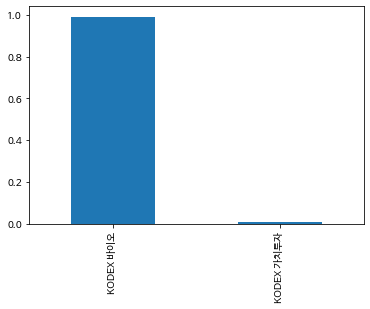

5
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


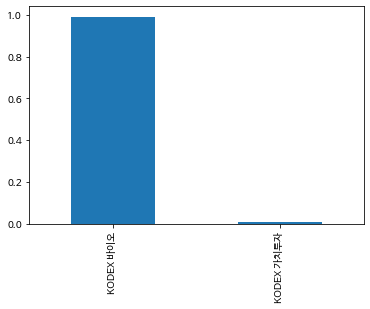

4
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


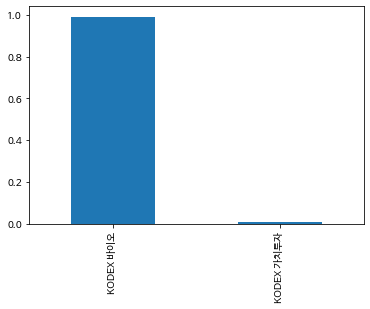

3
KODEX 바이오     0.01
KODEX 가치투자    0.99
dtype: float64


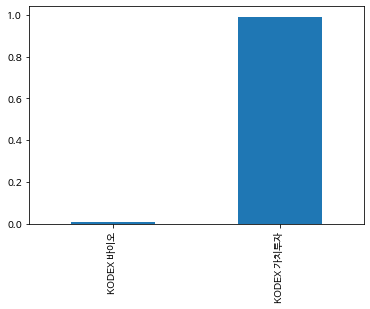

2
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


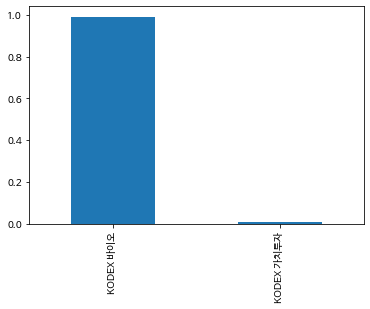

1
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


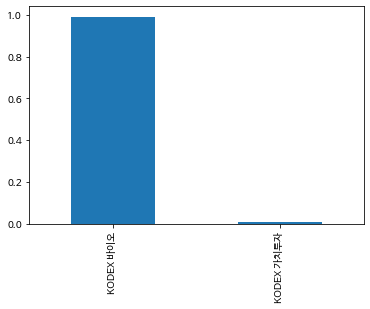

0
KODEX 바이오     0.06
KODEX 가치투자    0.94
dtype: float64


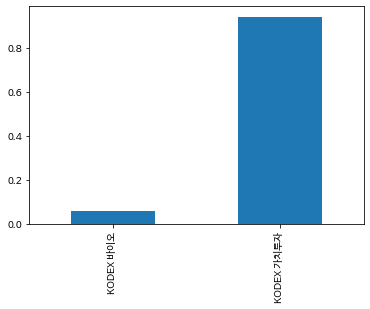

In [ ]:
w_bio, portfolio_bio, rebalancing_date_bio = back_test(data_bio[1:], ret)

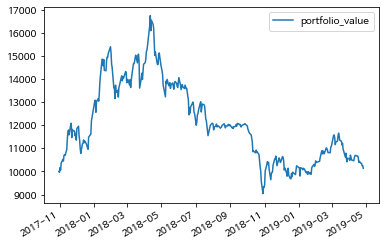

In [ ]:
portfolio_bio.plot()

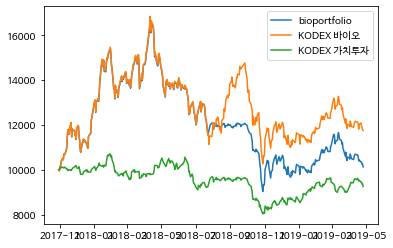

In [ ]:
# Backtest Result Plotting
plt.plot(portfolio_bio, label="bioportfolio")

for symbol in ['KODEX 바이오', 'KODEX 가치투자']:
    plt.plot(data_bio[121:][symbol] * 10000 / data_bio[121:][symbol][0], label='{}'.format(symbol))

plt.legend()
plt.show()

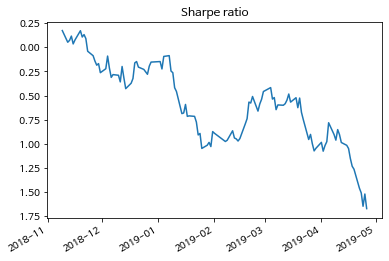

In [ ]:
# Sharpe Ratio 계산

new_port_bio = portfolio_bio
new_port_bio['returns'] = new_port_bio['portfolio_value'].pct_change(1)

# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    rf_rate = 0.01
    return (y.mean()*252 - rf_rate) / (y.std()*np.sqrt(252))

# Calculate rolling Sharpe ratio
new_port_bio['rs'] = new_port_bio['returns'].rolling(252).apply(my_rolling_sharpe)

new_port_bio['rs'][252:].plot()
plt.title('Sharpe ratio')
plt.show()

In [ ]:
portfolio_bio.values[-1][0]

10136.521865511637

In [ ]:
def back_test20(data, ret):

    # Window_size는 tangency portfolio를 구할 때 이전 몇 달의 데이터를 사용할 것인지 나타낸다.
    total_days = data.shape[0]
    
    # Rebalancing을 한 달마다 진행하는 경우, 'M'으로 rebalance_period는 20이 된다.
    rebalance_period = 20 # 3개월에 한번 = 분기당 한번
    window_size = 120 # 지난 6개월

    returns, cov_mat, avg_rets= create_data(data)
    
    # n_rebalance : 총 몇 번의 리밸런싱을 하게 되는지?
    n_rebalance = (total_days - window_size) // rebalance_period
    w = []
    rebalancing_date=[]
    original_weights = []
    
    rebal = 60
    for i in range(window_size, total_days):
        # 리밸런싱을 할 때 마다 Tangency portfolio weight를 새로 구해야 한다.
        # 이때 리밸런싱 시점 이전의 총 120일 간의 데이터를 사용한다.
        
        if rebal % rebalance_period == 0:
            #print('rebalance')
            _returns, _cov_mat, _avg_rets= create_data(data[(i-window_size):i])
            rebalancing_date.append(data.index[i:i+1]) # rebalance_period 씩 늘려가자
            rebal = 0
            _target_ret = _avg_rets.quantile(0.7)
            _min_ret = _avg_rets.min()
            _max_ret = _avg_rets.max()
            _w = tangency_portfolio(_cov_mat, _avg_rets, _target_ret, _min_ret, _max_ret)
            print(n_rebalance)
            n_rebalance = n_rebalance - 1
            print(_w)
            _w.plot.bar()
            plt.show()
            plt.close()
            _w = np.asarray(_w.values) #np.array([0.0, 0.0, 1.0, 0.0, 0.0])
            w.append(_w)
            

        rebal = rebal + 1
        
    
    price = data
    price = np.array(price)
    
    port = [] # 여기에 날마다 변하는 Portfolio value를 저장한다.
    port_date = [] # 여기에 portfolio의 data를 저장한다.
    portfolio_value = 10000
    port_each_money = [] # 그 날의 portfolio의 구성이다. Ex) 만약 Asset1에 6000원, Asset2에 4000원, 나머지에 0원이 있다면 [6000, 4000, 0, 0, 0]이 된다.
    
    rebal = 60
    j = 0
    for i in range(window_size, total_days):
        
        if i == window_size: # 초기화
            port_each_money = portfolio_value * w[j]
            rebal = 1
            # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
            portfolio_value = port_each_money.sum()
            # port에 portfolio_value를 저장하여 준다.
            port.append(portfolio_value)
            j = j+1


        else:
            #각 날마다 자산의 가격이 바뀌므로, port_each_money 변화한다.
            port_each_money = port_each_money * (1+ret.iloc[i])
            portfolio_value = port_each_money.sum()
            if rebal % rebalance_period == 0:
                rebal = 0
                # 리밸런싱을 하는 날이다. Portfolio value를 새로운 tangency portfolio weight로 맞춰준다.
                port_each_money = portfolio_value * w[j]
                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                j = j+1
            
            else:
                # 리밸런싱 날짜가 아닌 평범함 날짜. 
                # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
            
        rebal = rebal + 1
        port_date.append(data.index[i:i+1][0])
    
    portfolio = pd.DataFrame(port, columns = ['portfolio_value'], index = port_date)
    
    return w, portfolio, rebalancing_date

In [ ]:
data_bio

,KODEX 바이오,KODEX 가치투자
Name,,
2017-04-26,8005.0,11291.0
2017-04-27,7935.0,11267.0
2017-04-28,7860.0,11208.0
2017-05-02,7810.0,11306.0
2017-05-04,7900.0,11326.0
...,...,...
2019-04-22,11070.0,11160.0
2019-04-23,10970.0,11160.0
2019-04-24,10890.0,11050.0


In [ ]:
ret

,KODEX 바이오,KODEX 가치투자
Name,,
2017-04-27,-0.008745,-0.002126
2017-04-28,-0.009452,-0.005237
2017-05-02,-0.006361,0.008744
2017-05-04,0.011524,0.001769
2017-05-08,0.042405,0.013862
...,...,...
2019-04-22,0.005906,-0.008881
2019-04-23,-0.009033,0.000000
2019-04-24,-0.007293,-0.009857


18
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


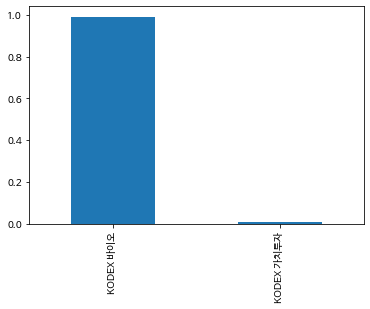

17
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


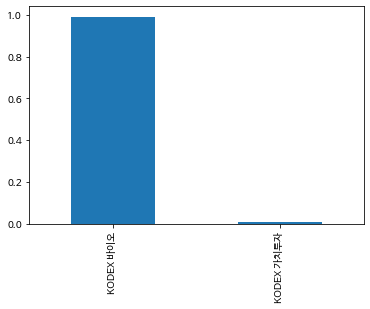

16
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


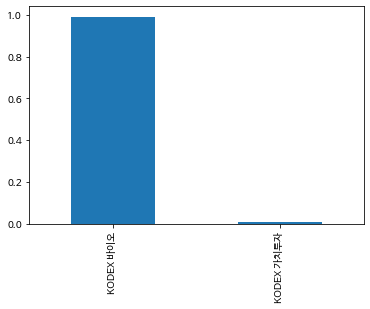

15
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


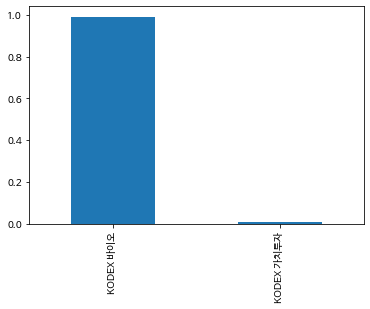

14
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


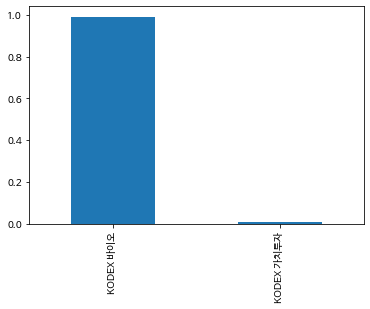

13
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


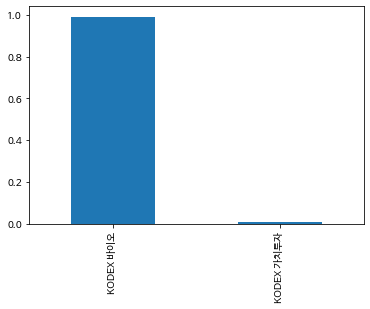

12
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


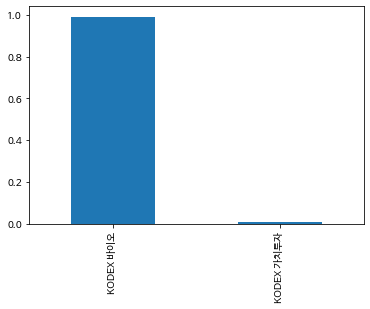

11
KODEX 바이오     0.81
KODEX 가치투자    0.19
dtype: float64


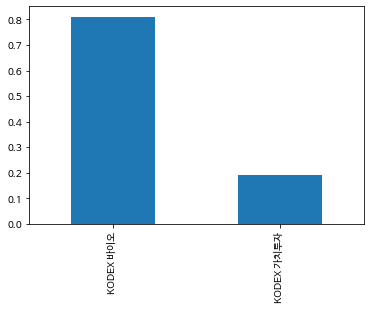

10
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


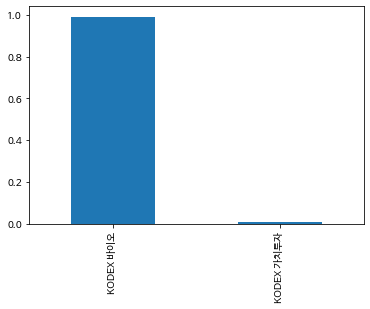

9
KODEX 바이오     0.01
KODEX 가치투자    0.99
dtype: float64


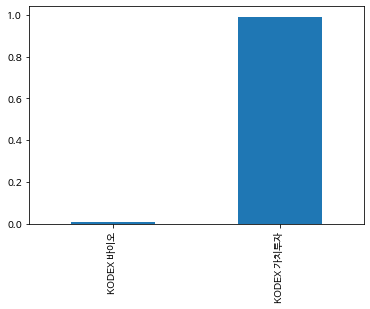

8
KODEX 바이오     0.01
KODEX 가치투자    0.99
dtype: float64


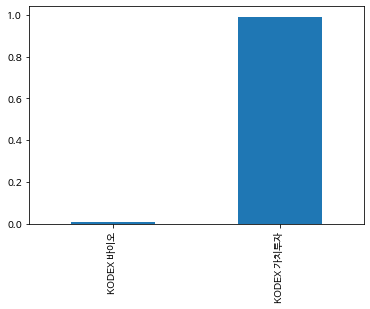

7
KODEX 바이오     0.01
KODEX 가치투자    0.99
dtype: float64


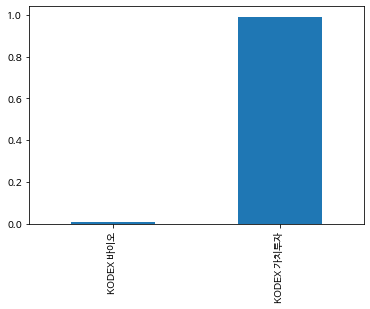

6
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


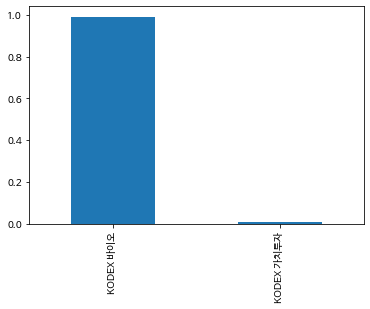

5
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


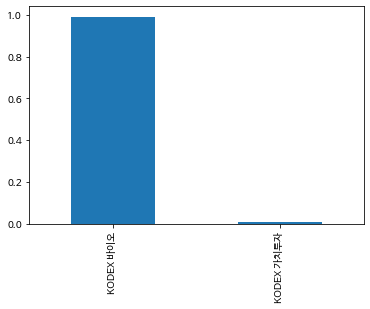

4
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


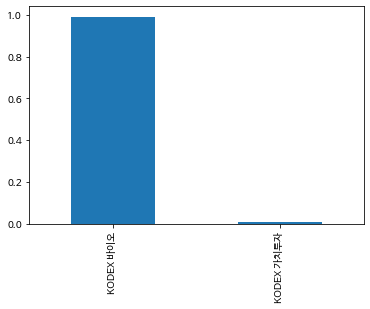

3
KODEX 바이오     0.99
KODEX 가치투자    0.01
dtype: float64


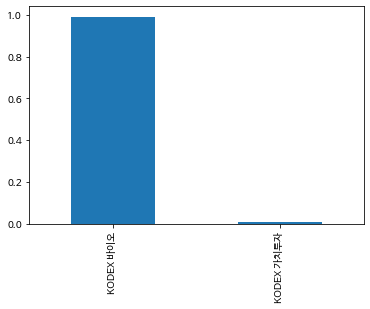

2
KODEX 바이오     1.390214e-08
KODEX 가치투자    1.000000e+00
dtype: float64


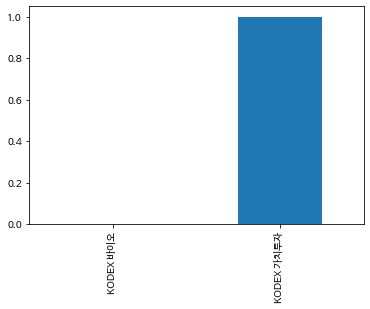

1
KODEX 바이오     5.111352e-08
KODEX 가치투자    9.999999e-01
dtype: float64


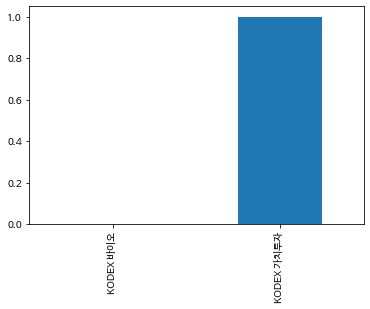

0
KODEX 바이오     0.06
KODEX 가치투자    0.94
dtype: float64


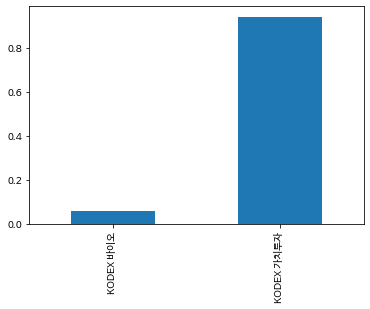

In [ ]:
w_bio, portfolio_bio, rebalancing_date_bio = back_test20(data_bio[1:], ret)

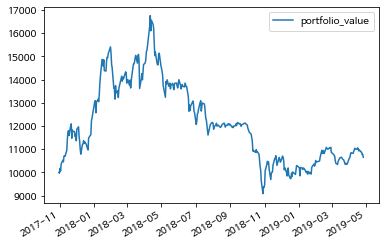

In [ ]:
portfolio_bio.plot()

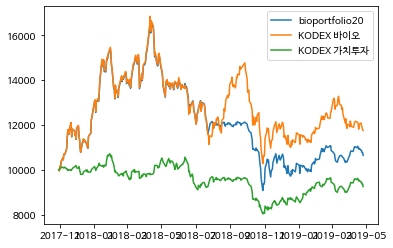

In [ ]:
# Backtest Result Plotting
plt.plot(portfolio_bio, label="bioportfolio20")

for symbol in ['KODEX 바이오', 'KODEX 가치투자']:
    plt.plot(data_bio[121:][symbol] * 10000 / data_bio[121:][symbol][0], label='{}'.format(symbol))

plt.legend()
plt.show()

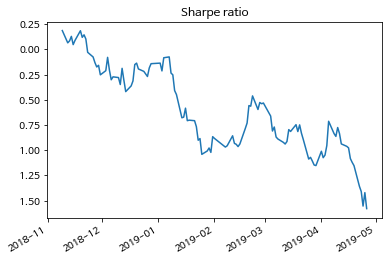

In [ ]:
# Sharpe Ratio 계산

new_port_bio = portfolio_bio
new_port_bio['returns'] = new_port_bio['portfolio_value'].pct_change(1)

# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    rf_rate = 0.01
    return (y.mean()*252 - rf_rate) / (y.std()*np.sqrt(252))

# Calculate rolling Sharpe ratio
new_port_bio['rs'] = new_port_bio['returns'].rolling(252).apply(my_rolling_sharpe)

new_port_bio['rs'][252:].plot()
plt.title('Sharpe ratio')
plt.show()

In [ ]:
portfolio_bio.values[-1][0]

10650.183727459864

## FINAL


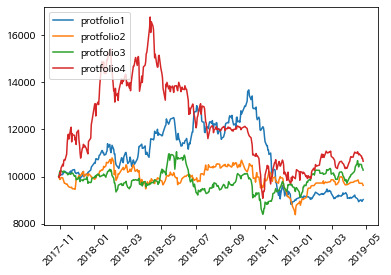

In [ ]:
plt.plot(portfolio_wti['portfolio_value'])
plt.plot(portfolio_klb['portfolio_value'])
plt.plot(portfolio_ta['portfolio_value'])
plt.plot(portfolio_bio['portfolio_value'])
plt.xticks(rotation=45)
plt.legend(labels = ['protfolio1','protfolio2','protfolio3','protfolio4'],loc = 'upper left')

Text(0.5, 1.0, 'Sharpe ratio')

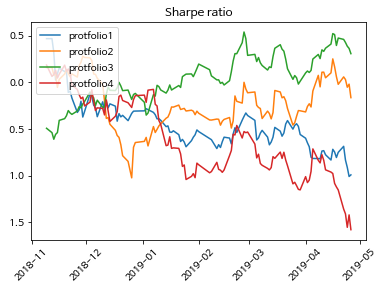

In [ ]:
plt.plot(new_port_wti['rs'][252:])
plt.plot(new_port_klb['rs'][252:])
plt.plot(new_port_ta['rs'][252:])
plt.plot(new_port_bio['rs'][252:])
plt.xticks(rotation=45)
plt.legend(labels = ['protfolio1','protfolio2','protfolio3','protfolio4'],loc = 'upper left')
plt.title('Sharpe ratio')

# ALL


In [ ]:
data_all = data[['KODEX WTI원유선물(H)','KODEX 골드선물(H)','흥국 S&P코리아로우볼','KODEX 미국S&P금융(합성)','KODEX 턴어라운드투자','TIGER 200커버드콜5%OTM','KODEX 바이오','KODEX 가치투자']]
data_all= data_all.dropna()
data_all

,KODEX WTI원유선물(H),KODEX 골드선물(H),흥국 S&P코리아로우볼,KODEX 미국S&P금융(합성),KODEX 턴어라운드투자,TIGER 200커버드콜5%OTM,KODEX 바이오,KODEX 가치투자
Name,,,,,,,,
2016-12-27,20055.0,8720.0,10535.0,15010.0,9895.0,11270.0,7975.0,10162.0
2016-12-28,20285.0,8735.0,10636.0,15030.0,9989.0,11320.0,8440.0,10265.0
2016-12-29,20300.0,8780.0,10640.0,14870.0,10018.0,11325.0,8255.0,10323.0
2017-01-02,20345.0,8900.0,10631.0,14775.0,10018.0,11380.0,8170.0,10342.0
2017-01-03,20360.0,8845.0,10559.0,14745.0,10023.0,11440.0,8195.0,10411.0
...,...,...,...,...,...,...,...,...
2019-04-22,22870.0,9275.0,11010.0,16125.0,12790.0,12630.0,11070.0,11160.0
2019-04-23,23110.0,9220.0,11010.0,16195.0,12775.0,12650.0,10970.0,11160.0
2019-04-24,23080.0,9200.0,11010.0,16310.0,12625.0,12470.0,10890.0,11050.0


In [ ]:
holding_periods=1
n_term=252 

returns_all = data_all.pct_change(holding_periods).iloc[holding_periods:] 
exp_rets_all = returns_all.mean() * n_term
cov_mat_all = returns_all.cov() * n_term
corr_mat_all = returns_all.corr()

<Figure size 7200x7200 with 0 Axes>

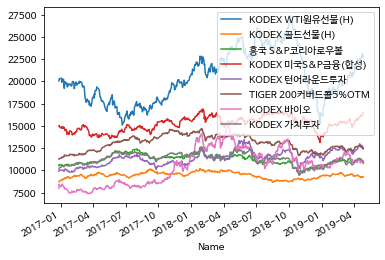

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(100, 100))
data_all.plot()

<Figure size 7200x7200 with 0 Axes>

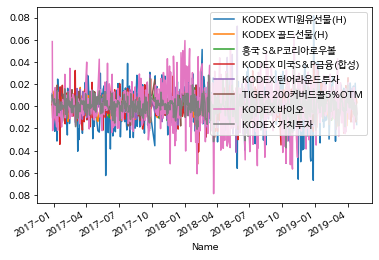

In [ ]:
plt.figure(figsize=(100, 100))
returns_all.plot()

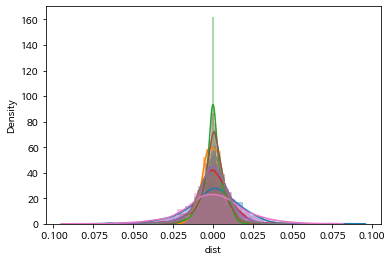

In [ ]:
import seaborn as sns
sns.distplot(returns_all['KODEX WTI원유선물(H)'])
sns.distplot(returns_all['KODEX 골드선물(H)'])
sns.distplot(returns_all['흥국 S&P코리아로우볼'])
sns.distplot(returns_all['KODEX 미국S&P금융(합성)'])
sns.distplot(returns_all['KODEX 턴어라운드투자'])
sns.distplot(returns_all['TIGER 200커버드콜5%OTM'])
sns.distplot(returns_all['KODEX 바이오'])
sns.distplot(returns_all['KODEX 가치투자'])
plt.xlabel('dist')
plt.show()

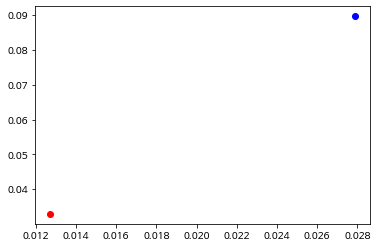

In [ ]:
mlb_var = returns_ta.var() * n_term
plt.scatter(mlb_var[0],exp_rets_all[0],color = 'blue')
plt.scatter(mlb_var[1],exp_rets_all[1],color = 'red')
plt.show()

In [ ]:
holding_periods=1
n_term = 252

returns_all = data_all.pct_change(holding_periods).iloc[holding_periods:] 

exp_rets_all = returns_all.mean() * n_term 
cov_mat_all = returns_all.cov() * n_term 
corr_mat_all = returns_all.corr() 

In [ ]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
    n = len(cov_mat)

    # Objective function
    # min (1/2)*w.T*P*w
    P = opt.matrix(cov_mat.values) 
    q = opt.matrix(0.0, (n, 1))


    # Constraints Gw <= h
    # exp_rets*w >= target_ret and w >= 0
    G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
    h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

    # Constraints Aw = b
    # sum(w) = 1
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Solve
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)

    # Put weights into a labeled series
    w = pd.Series(sol['x'], index=cov_mat.index)

    return w

In [ ]:
max_risk=0.5
max_ret = exp_rets_all.max()
min_ret = exp_rets_all[exp_rets_all > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks_all = []
rets_all = []
weights_all = []

for step in range(0, n_step+1):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat_all, exp_rets_all, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat_all), _w))


    if risk > max_risk:
        break

    risks_all.append(risk)
    ret = np.dot(exp_rets_all, _w)
    rets_all.append(ret)
    weights_all.append(_w)


In [ ]:
min_risk_all_idx = np.argmin(risks_all)
min_risk_all = risks_all[min_risk_all_idx] 
min_risk_ret_all = rets_all[min_risk_all_idx]
min_risk_weight_all = weights_all[min_risk_all_idx]
print("Risk of minimum variance portfolio : ", min_risk_all)
print("Return of minimum variance portfolio : ", min_risk_ret_all)
print("Weight of minimum variance portfolio :  ")
print(min_risk_weight_all)

Risk of minimum variance portfolio :  0.061301921565978634
Return of minimum variance portfolio :  0.03634333922818977
Weight of minimum variance portfolio :  
KODEX WTI원유선물(H)      4.377035e-03
KODEX 골드선물(H)         4.536351e-01
흥국 S&P코리아로우볼          2.360760e-01
KODEX 미국S&P금융(합성)     1.715842e-01
KODEX 턴어라운드투자         1.542454e-07
TIGER 200커버드콜5%OTM    1.343223e-01
KODEX 바이오             9.742019e-08
KODEX 가치투자            5.144853e-06
dtype: float64


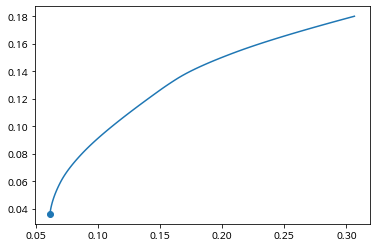

In [ ]:
plt.plot(risks_all, rets_all)
plt.scatter(min_risk_all, min_risk_ret_all)
plt.show()

In [ ]:
holding_periods=1
n_term=252 

returns_all = data_all.pct_change(holding_periods).iloc[holding_periods:] 
exp_rets_all = returns_all.mean() * n_term
cov_mat_all= returns_all.cov() * n_term
corr_mat_all = returns_all.corr()

In [ ]:
rf_rate = 0.005

slopes_all = []

# ToDo
for i in range(len(rets_all)):
    slope_ = (rets_all[i] - rf_rate) / risks_all[i]
    slopes_all.append(slope_)

max_tangency_all_idx = np.argmax(slopes_all)
max_tangency_all = slopes_all[max_tangency_all_idx]

In [ ]:
max_tangency_risk_all = risks_all[max_tangency_all_idx]
max_tangency_return_all = rets_all[max_tangency_all_idx]
max_tangency_weight_all = weights_all[max_tangency_all_idx]

print("Risk of tangency portfolio : ", max_tangency_risk_all)
print("Return of tangency portfolio : ", max_tangency_return_all)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return_all - rf_rate) / max_tangency_risk_all)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight_all)

Risk of tangency portfolio :  0.09330973936380131
Return of tangency portfolio :  0.08585139701649021
Sharpe ratio of tangency portfolio :  0.8664840087191991
Weight of minimum variance portfolio : 
KODEX WTI원유선물(H)      7.403580e-02
KODEX 골드선물(H)         3.242864e-01
흥국 S&P코리아로우볼          6.689877e-08
KODEX 미국S&P금융(합성)     1.771842e-01
KODEX 턴어라운드투자         2.894025e-01
TIGER 200커버드콜5%OTM    6.617914e-06
KODEX 바이오             1.350844e-01
KODEX 가치투자            3.149757e-08
dtype: float64


In [ ]:
ys_all = []
for i in range(len(risks_all)):
    ys_all.append(max_tangency_all * risks_all[i] + rf_rate)

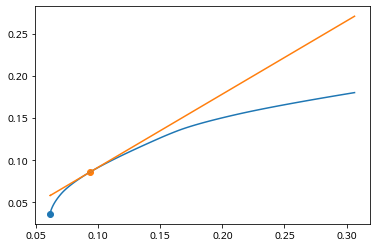

In [ ]:
plt.plot(risks_all, rets_all)
plt.plot(risks_all, ys_all)
plt.scatter(min_risk_all, min_risk_ret_all)
plt.scatter(max_tangency_risk_all, max_tangency_return_all)
plt.show()

In [ ]:
fin_w_f = list(np.arange(0,1.01,0.05))
fin_w_r = list(reversed(fin_w_f))


fin_ret_all = []
fin_risk_all =[]

for i in range(len(fin_w_f)):
  ret = 0.005*fin_w_f[i] + fin_w_r[i] * float(max_tangency_return_all)
  risk = fin_w_r[i]*max_tangency_risk_all
  fin_ret_all.append(round(ret,3))
  fin_risk_all.append(round(risk,3))

fin_all_port = pd.DataFrame([fin_w_f,fin_w_r,fin_ret_all,fin_risk_all]).T
fin_all_port.columns = ['free_weight','risk_weight','allport_ret','allport_risk']


In [ ]:
fin_all_port

,free_weight,risk_weight,allport_ret,allport_risk
0,0.00,1.00,0.086,0.093
1,0.05,0.95,0.082,0.089
2,0.10,0.90,0.078,0.084
3,0.15,0.85,0.074,0.079
4,0.20,0.80,0.070,0.075
5,0.25,0.75,0.066,0.070
6,0.30,0.70,0.062,0.065
7,0.35,0.65,0.058,0.061
8,0.40,0.60,0.054,0.056
9,0.45,0.55,0.049,0.051


In [ ]:
data_all = data_all['2017-04-26':]

In [ ]:
def create_data(data):
    
    result = data.pct_change(20).iloc[20:]
    
    returns = result
    avg_rets = returns.mean()*12
    cov_mat = returns.cov()*12

    return returns, cov_mat, avg_rets

In [ ]:
def tangency_portfolio(cov_mat, exp_rets, target_ret, min_rets, max_rets, rf_rate = 0.01):
    
    n = len(cov_mat)
    P = opt.matrix(cov_mat.values)
    q = opt.matrix(0.0, (n, 1))
    
    tangency_queue = []
    weights_queue = []
    return_queue = []
    cov_queue = []
    
    step = (max_rets - min_rets)/100
    for i in range(100):
                
        try:
        
            target_ret = min_rets + (i * step)

            # Constraints Gx <= h

            G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
            h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

            # Constraints Ax = b
            # sum(x) = 1
            A = opt.matrix(1.0, (1, n))
            b = opt.matrix(1.0)

            solvers.options['show_progress'] = False
            sol = solvers.qp(P, q, G, h, A, b)

            if sol['status'] != 'optimal':
                pass

            # Put weights into a labeled series
            weights = pd.Series(sol['x'], index=cov_mat.index)
            
            tangency_ = (np.dot(exp_rets, weights) - rf_rate) / np.sqrt(np.dot(np.dot(weights, cov_mat), weights))
            tangency_queue.append(tangency_)
            weights_queue.append(weights)
            return_queue.append(np.dot(exp_rets, weights))
            cov_queue.append(np.sqrt(np.dot(np.dot(weights, cov_mat), weights)))
        
        except:
            pass

    
    tan_index = tangency_queue.index(max(tangency_queue))
    
    weights = weights_queue[tan_index]

    return weights 

In [ ]:
ret = data_all.pct_change().iloc[1:]

In [ ]:
data_all.shape

(487, 8)

In [ ]:
def back_test(data, ret):

    # Window_size는 tangency portfolio를 구할 때 이전 몇 달의 데이터를 사용할 것인지 나타낸다.
    total_days = data.shape[0]
    
    # Rebalancing을 한 달마다 진행하는 경우, 'M'으로 rebalance_period는 20이 된다.
    rebalance_period = 20 # 3개월에 한번 = 분기당 한번
    window_size = 120 # 지난 6개월

    returns, cov_mat, avg_rets= create_data(data)
    
    # n_rebalance : 총 몇 번의 리밸런싱을 하게 되는지?
    n_rebalance = (total_days - window_size) // rebalance_period
    w = []
    rebalancing_date=[]
    original_weights = []
    
    rebal = 60
    for i in range(window_size, total_days):
        # 리밸런싱을 할 때 마다 Tangency portfolio weight를 새로 구해야 한다.
        # 이때 리밸런싱 시점 이전의 총 120일 간의 데이터를 사용한다.
        
        if rebal % rebalance_period == 0:
            #print('rebalance')
            _returns, _cov_mat, _avg_rets= create_data(data[(i-window_size):i])
            rebalancing_date.append(data.index[i:i+1]) # rebalance_period 씩 늘려가자
            rebal = 0
            _target_ret = _avg_rets.quantile(0.7)
            _min_ret = _avg_rets.min()
            _max_ret = _avg_rets.max()
            _w = tangency_portfolio(_cov_mat, _avg_rets, _target_ret, _min_ret, _max_ret)
            print(n_rebalance)
            n_rebalance = n_rebalance - 1
            print(_w)
            _w.plot.bar()
            plt.show()
            plt.close()
            _w = np.asarray(_w.values) #np.array([0.0, 0.0, 1.0, 0.0, 0.0])
            w.append(_w)
            

        rebal = rebal + 1
        
    
    price = data
    price = np.array(price)
    
    port = [] # 여기에 날마다 변하는 Portfolio value를 저장한다.
    port_date = [] # 여기에 portfolio의 data를 저장한다.
    portfolio_value = 10000
    port_each_money = [] # 그 날의 portfolio의 구성이다. Ex) 만약 Asset1에 6000원, Asset2에 4000원, 나머지에 0원이 있다면 [6000, 4000, 0, 0, 0]이 된다.
    
    rebal = 60
    j = 0
    for i in range(window_size, total_days):
        
        if i == window_size: # 초기화
            port_each_money = portfolio_value * w[j]
            rebal = 1
            # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
            portfolio_value = port_each_money.sum()
            # port에 portfolio_value를 저장하여 준다.
            port.append(portfolio_value)
            j = j+1


        else:
            #각 날마다 자산의 가격이 바뀌므로, port_each_money 변화한다.
            port_each_money = port_each_money * (1+ret.iloc[i])
            portfolio_value = port_each_money.sum()
            if rebal % rebalance_period == 0:
                rebal = 0
                # 리밸런싱을 하는 날이다. Portfolio value를 새로운 tangency portfolio weight로 맞춰준다.
                port_each_money = portfolio_value * w[j]
                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                j = j+1
            
            else:
                # 리밸런싱 날짜가 아닌 평범함 날짜. 
                # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
            
        rebal = rebal + 1
        port_date.append(data.index[i:i+1][0])
    
    portfolio = pd.DataFrame(port, columns = ['portfolio_value'], index = port_date)
    
    return w, portfolio, rebalancing_date

In [ ]:
data_all

,KODEX WTI원유선물(H),KODEX 골드선물(H),흥국 S&P코리아로우볼,KODEX 미국S&P금융(합성),KODEX 턴어라운드투자,TIGER 200커버드콜5%OTM,KODEX 바이오,KODEX 가치투자
Name,,,,,,,,
2017-04-26,17810.0,9570.0,11182.0,14100.0,10572.0,12510.0,8005.0,11291.0
2017-04-27,17770.0,9585.0,11207.0,14155.0,10597.0,12520.0,7935.0,11267.0
2017-04-28,17815.0,9620.0,11172.0,14035.0,10493.0,12570.0,7860.0,11208.0
2017-05-02,17535.0,9500.0,11172.0,13990.0,10522.0,12630.0,7810.0,11306.0
2017-05-04,17150.0,9370.0,11275.0,14040.0,10512.0,12715.0,7900.0,11326.0
...,...,...,...,...,...,...,...,...
2019-04-22,22870.0,9275.0,11010.0,16125.0,12790.0,12630.0,11070.0,11160.0
2019-04-23,23110.0,9220.0,11010.0,16195.0,12775.0,12650.0,10970.0,11160.0
2019-04-24,23080.0,9200.0,11010.0,16310.0,12625.0,12470.0,10890.0,11050.0


In [ ]:
ret

,KODEX WTI원유선물(H),KODEX 골드선물(H),흥국 S&P코리아로우볼,KODEX 미국S&P금융(합성),KODEX 턴어라운드투자,TIGER 200커버드콜5%OTM,KODEX 바이오,KODEX 가치투자
Name,,,,,,,,
2017-04-27,-0.002246,0.001567,0.002236,0.003901,0.002365,0.000799,-0.008745,-0.002126
2017-04-28,0.002532,0.003652,-0.003123,-0.008478,-0.009814,0.003994,-0.009452,-0.005237
2017-05-02,-0.015717,-0.012474,0.000000,-0.003206,0.002764,0.004773,-0.006361,0.008744
2017-05-04,-0.021956,-0.013684,0.009219,0.003574,-0.000950,0.006730,0.011524,0.001769
2017-05-08,-0.023324,-0.005870,0.009135,0.004274,0.009037,0.006292,0.042405,0.013862
...,...,...,...,...,...,...,...,...
2019-04-22,0.020754,0.003788,0.000000,-0.004322,-0.000781,-0.001976,0.005906,-0.008881
2019-04-23,0.010494,-0.005930,0.000000,0.004341,-0.001173,0.001584,-0.009033,0.000000
2019-04-24,-0.001298,-0.002169,0.000000,0.007101,-0.011742,-0.014229,-0.007293,-0.009857


18
KODEX WTI원유선물(H)      0.016451
KODEX 골드선물(H)         0.466624
흥국 S&P코리아로우볼          0.000023
KODEX 미국S&P금융(합성)     0.290619
KODEX 턴어라운드투자         0.000015
TIGER 200커버드콜5%OTM    0.226239
KODEX 바이오             0.000003
KODEX 가치투자            0.000026
dtype: float64


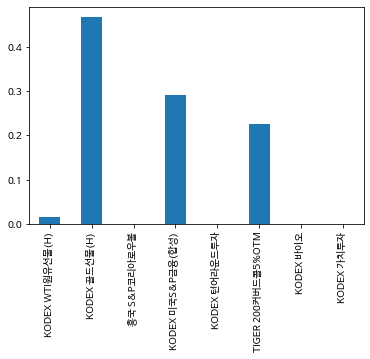

17
KODEX WTI원유선물(H)      8.294597e-02
KODEX 골드선물(H)         4.082578e-01
흥국 S&P코리아로우볼          7.346683e-07
KODEX 미국S&P금융(합성)     2.748370e-01
KODEX 턴어라운드투자         1.084765e-06
TIGER 200커버드콜5%OTM    1.754043e-01
KODEX 바이오             5.855204e-02
KODEX 가치투자            1.034290e-06
dtype: float64


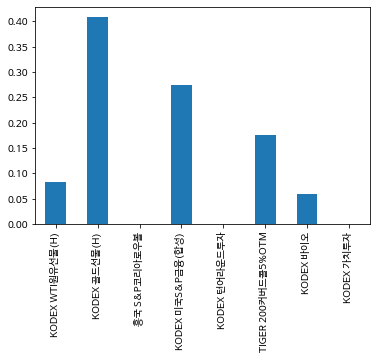

16
KODEX WTI원유선물(H)      0.101849
KODEX 골드선물(H)         0.420695
흥국 S&P코리아로우볼          0.000003
KODEX 미국S&P금융(합성)     0.351551
KODEX 턴어라운드투자         0.000001
TIGER 200커버드콜5%OTM    0.000001
KODEX 바이오             0.125895
KODEX 가치투자            0.000004
dtype: float64


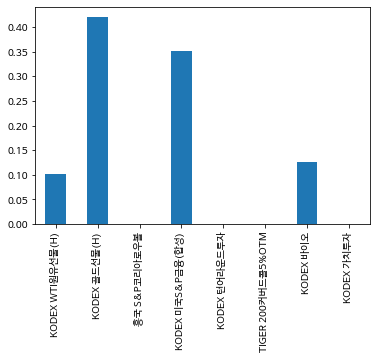

15
KODEX WTI원유선물(H)      2.063891e-01
KODEX 골드선물(H)         5.275435e-03
흥국 S&P코리아로우볼          4.767355e-09
KODEX 미국S&P금융(합성)     5.136581e-01
KODEX 턴어라운드투자         2.823977e-09
TIGER 200커버드콜5%OTM    1.618570e-07
KODEX 바이오             2.746772e-01
KODEX 가치투자            9.896207e-09
dtype: float64


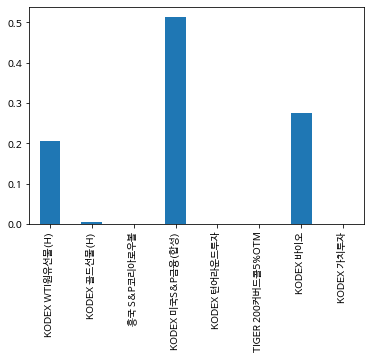

14
KODEX WTI원유선물(H)      4.551358e-01
KODEX 골드선물(H)         3.722935e-08
흥국 S&P코리아로우볼          3.696697e-08
KODEX 미국S&P금융(합성)     4.513900e-01
KODEX 턴어라운드투자         4.369034e-08
TIGER 200커버드콜5%OTM    1.107412e-08
KODEX 바이오             9.347402e-02
KODEX 가치투자            1.992704e-08
dtype: float64


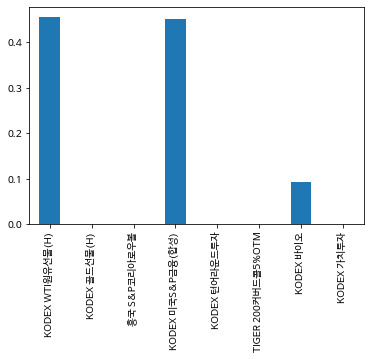

13
KODEX WTI원유선물(H)      3.133499e-01
KODEX 골드선물(H)         2.192252e-08
흥국 S&P코리아로우볼          1.011440e-08
KODEX 미국S&P금융(합성)     2.711516e-01
KODEX 턴어라운드투자         9.708940e-09
TIGER 200커버드콜5%OTM    7.096002e-09
KODEX 바이오             4.154985e-01
KODEX 가치투자            6.414789e-09
dtype: float64


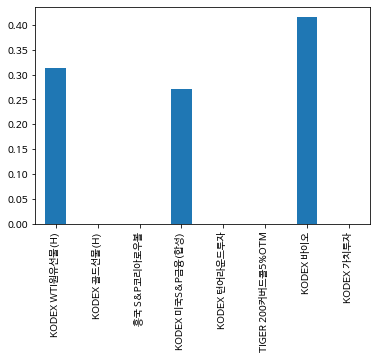

12
KODEX WTI원유선물(H)      5.870380e-01
KODEX 골드선물(H)         1.091296e-06
흥국 S&P코리아로우볼          2.139658e-07
KODEX 미국S&P금융(합성)     2.866762e-06
KODEX 턴어라운드투자         2.062998e-07
TIGER 200커버드콜5%OTM    1.080832e-07
KODEX 바이오             4.129574e-01
KODEX 가치투자            1.149642e-07
dtype: float64


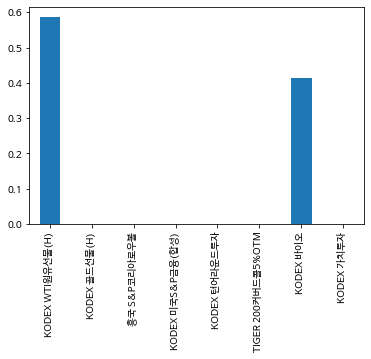

11
KODEX WTI원유선물(H)      9.835732e-01
KODEX 골드선물(H)         4.424957e-03
흥국 S&P코리아로우볼          3.000085e-07
KODEX 미국S&P금융(합성)     1.592287e-07
KODEX 턴어라운드투자         8.140384e-03
TIGER 200커버드콜5%OTM    2.582666e-07
KODEX 바이오             3.860498e-03
KODEX 가치투자            2.795307e-07
dtype: float64


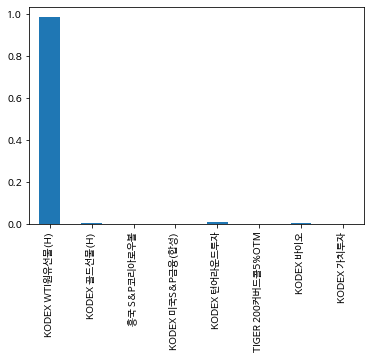

10
KODEX WTI원유선물(H)      2.106583e-01
KODEX 골드선물(H)         5.399176e-08
흥국 S&P코리아로우볼          1.084743e-08
KODEX 미국S&P금융(합성)     1.923951e-08
KODEX 턴어라운드투자         7.712250e-01
TIGER 200커버드콜5%OTM    1.466353e-08
KODEX 바이오             1.811659e-02
KODEX 가치투자            1.388071e-08
dtype: float64


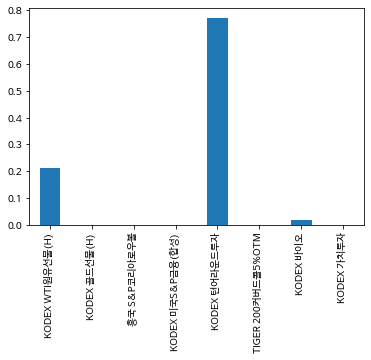

9
KODEX WTI원유선물(H)      9.846456e-01
KODEX 골드선물(H)         6.921866e-07
흥국 S&P코리아로우볼          1.173602e-07
KODEX 미국S&P금융(합성)     9.237599e-06
KODEX 턴어라운드투자         1.534289e-02
TIGER 200커버드콜5%OTM    9.647690e-07
KODEX 바이오             1.731713e-07
KODEX 가치투자            2.989263e-07
dtype: float64


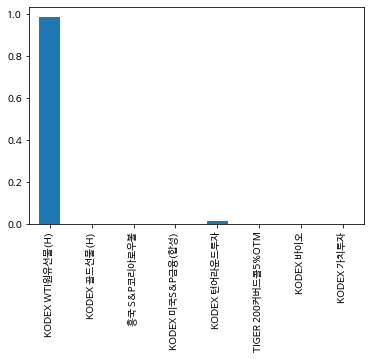

8
KODEX WTI원유선물(H)      5.400099e-01
KODEX 골드선물(H)         6.829651e-08
흥국 S&P코리아로우볼          7.980725e-08
KODEX 미국S&P금융(합성)     3.529336e-01
KODEX 턴어라운드투자         1.070557e-01
TIGER 200커버드콜5%OTM    9.018602e-08
KODEX 바이오             6.409759e-08
KODEX 가치투자            4.224413e-07
dtype: float64


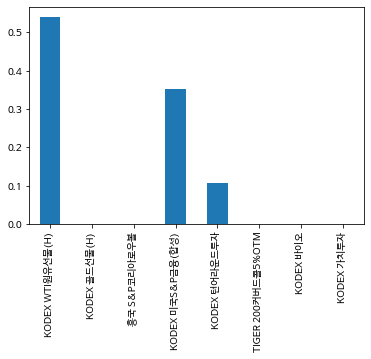

7
KODEX WTI원유선물(H)      1.370949e-01
KODEX 골드선물(H)         1.212824e-08
흥국 S&P코리아로우볼          1.238324e-08
KODEX 미국S&P금융(합성)     8.415439e-01
KODEX 턴어라운드투자         5.366903e-03
TIGER 200커버드콜5%OTM    1.249586e-08
KODEX 바이오             1.599432e-02
KODEX 가치투자            1.876527e-08
dtype: float64


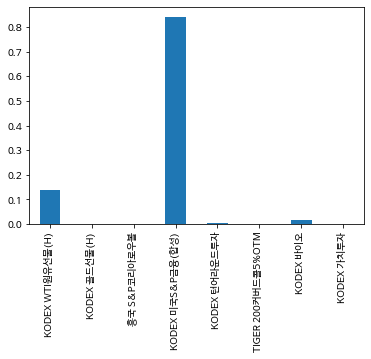

6
KODEX WTI원유선물(H)      3.734359e-01
KODEX 골드선물(H)         9.694285e-07
흥국 S&P코리아로우볼          6.116777e-07
KODEX 미국S&P금융(합성)     6.265581e-01
KODEX 턴어라운드투자         2.128975e-06
TIGER 200커버드콜5%OTM    6.717352e-07
KODEX 바이오             1.124579e-06
KODEX 가치투자            5.126011e-07
dtype: float64


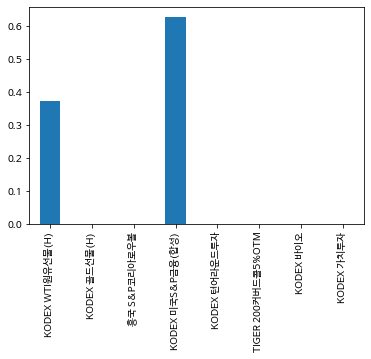

5
KODEX WTI원유선물(H)      8.643844e-02
KODEX 골드선물(H)         1.607765e-02
흥국 S&P코리아로우볼          2.835007e-08
KODEX 미국S&P금융(합성)     8.974838e-01
KODEX 턴어라운드투자         2.157266e-08
TIGER 200커버드콜5%OTM    2.671274e-08
KODEX 바이오             2.056698e-08
KODEX 가치투자            1.683037e-08
dtype: float64


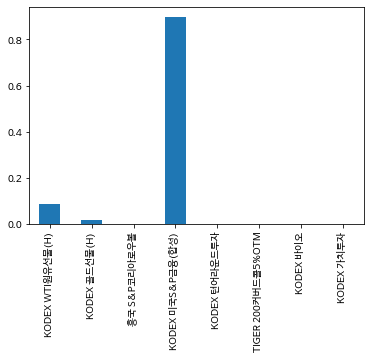

4
KODEX WTI원유선물(H)      2.980214e-09
KODEX 골드선물(H)         6.823882e-02
흥국 S&P코리아로우볼          9.402081e-09
KODEX 미국S&P금융(합성)     1.596851e-09
KODEX 턴어라운드투자         9.317611e-01
TIGER 200커버드콜5%OTM    7.039792e-09
KODEX 바이오             1.496502e-08
KODEX 가치투자            9.314692e-09
dtype: float64


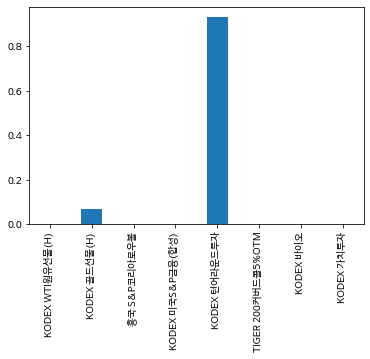

3
KODEX WTI원유선물(H)      1.040979e-08
KODEX 골드선물(H)         9.418495e-01
흥국 S&P코리아로우볼          8.401755e-08
KODEX 미국S&P금융(합성)     2.876728e-08
KODEX 턴어라운드투자         5.967301e-03
TIGER 200커버드콜5%OTM    3.730974e-08
KODEX 바이오             5.218305e-02
KODEX 가치투자            3.307250e-08
dtype: float64


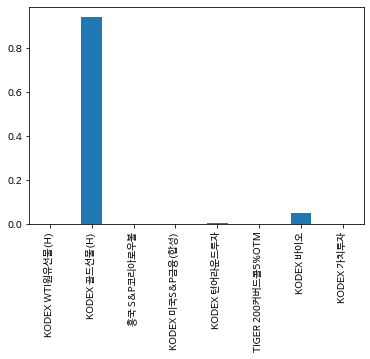

2
KODEX WTI원유선물(H)      4.217390e-07
KODEX 골드선물(H)         8.938960e-01
흥국 S&P코리아로우볼          2.240872e-06
KODEX 미국S&P금융(합성)     7.267026e-06
KODEX 턴어라운드투자         1.060911e-01
TIGER 200커버드콜5%OTM    1.831146e-06
KODEX 바이오             6.182072e-07
KODEX 가치투자            5.853362e-07
dtype: float64


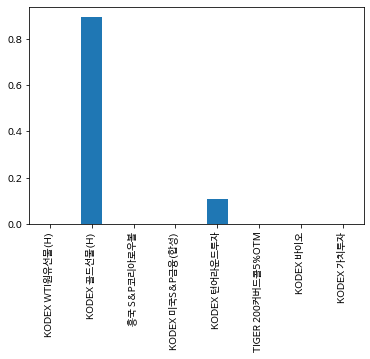

1
KODEX WTI원유선물(H)      2.782821e-07
KODEX 골드선물(H)         8.552935e-01
흥국 S&P코리아로우볼          4.977262e-02
KODEX 미국S&P금융(합성)     1.437017e-02
KODEX 턴어라운드투자         8.055892e-02
TIGER 200커버드콜5%OTM    7.219995e-07
KODEX 바이오             2.403952e-06
KODEX 가치투자            1.377198e-06
dtype: float64


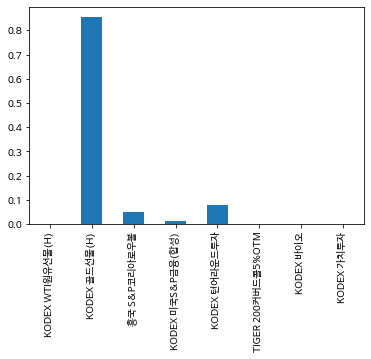

0
KODEX WTI원유선물(H)      0.046619
KODEX 골드선물(H)         0.009045
흥국 S&P코리아로우볼          0.944325
KODEX 미국S&P금융(합성)     0.000002
KODEX 턴어라운드투자         0.000001
TIGER 200커버드콜5%OTM    0.000004
KODEX 바이오             0.000002
KODEX 가치투자            0.000001
dtype: float64


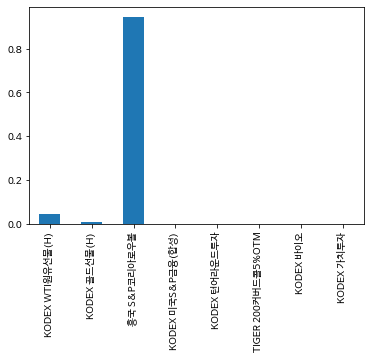

In [ ]:
w, portfolio, rebalancing_date = back_test(data_all[1:], ret)

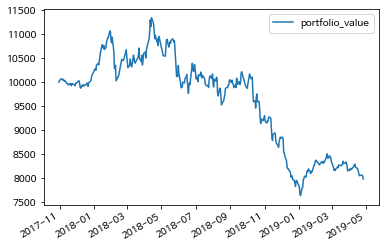

In [ ]:
portfolio.plot()

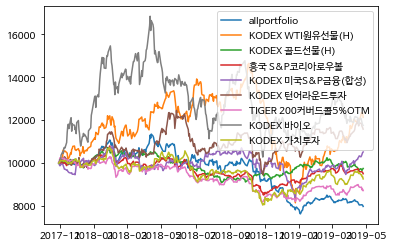

In [ ]:
# Backtest Result Plotting
plt.plot(portfolio, label="allportfolio")

for symbol in ['KODEX WTI원유선물(H)','KODEX 골드선물(H)','흥국 S&P코리아로우볼','KODEX 미국S&P금융(합성)','KODEX 턴어라운드투자','TIGER 200커버드콜5%OTM','KODEX 바이오','KODEX 가치투자']:
    plt.plot(data_all[121:][symbol] * 10000 / data_all[121:][symbol][0], label='{}'.format(symbol))

plt.legend()
plt.show()

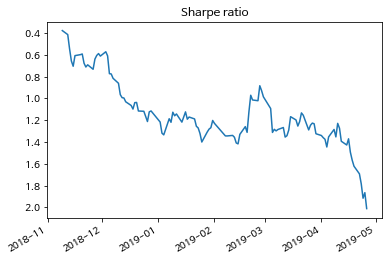

In [ ]:
# Sharpe Ratio 계산

new_port = portfolio
new_port['returns'] = new_port['portfolio_value'].pct_change(1)

# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    rf_rate = 0.01
    return (y.mean()*252 - rf_rate) / (y.std()*np.sqrt(252))

# Calculate rolling Sharpe ratio
new_port['rs'] = new_port['returns'].rolling(252).apply(my_rolling_sharpe)

new_port['rs'][252:].plot()
plt.title('Sharpe ratio')
plt.show()

In [ ]:
portfolio.values[-1][0]

7978.372161886486